## 1. Introduction

* Heart disease is perceived as the deadliest disease in the human life across the world. In particular, in this type of disease the heart is not capable in pushing the required quantity of blood to the remaining organs of the human body in order to accomplish the regular functionalities. Some of the symptoms of heart disease include physical body weakness, improper breathing, swollen feet, etc. The techniques are essential to identify the complicated heartdiseases which results in high risk in turn affect the human life. Presently, diagnosis and treatment process arehighly challenging due to inadequacy of physicians and diagnostic apparatus that affect the treatment of heart patients. Early diagnosis of heart disease is significant to minimize the heart related issues and to protect it from serious risks. The invasive techniques are implemented to diagnose heart diseases based on medical history, symptom analysis report by experts, and physical laboratory report. Moreover, it causes delay and imprecise diagnosis due to human intervention. It is time consuming, computationally intensive and expensive at the time of assessment.

* Heart disease can be affected based on various symptoms such as age, gender, pulse rate etc. Data analysisin healthcare assists in predicting diseases, improving diagnosis, analyzing symptoms, providing appropriate medicines, improving the quality of care, minimizing cost, extending the life span and reduces the death rate of heartpatients. ECG (Electro Cardio Gram) helps in screening irregular heart beat and stroke with the embedded sensors by resting it on a chest in order to track the patient’s heart beat.

* Here i will do some EDA(Exploratory data Analysis) on the given to find out which features is influencing heart disease more. 

## 2. Dataset

* The analysis is carried out using publicly available data for heart disease. The dataset consist of 303 records with 14 attributes such as age, gender, chest pain, blood pressure, cholestrol, blood sugar, maximum heart rate, Exercise induced angina, ECG in rest etc. The dataset is analyzed with visualization tool PowerBI and in Python. 

* **Age**: Adults age 65 and older are more likely than younger people to suffer from cardiovascular disease, which is problems with the heart, blood vessels, or both. Aging can cause changes in the heart and blood vessels that may increase a person's risk of developing cardiovascular disease.


* **Gender(sex)**: Men generally develop CVD at a younger age and have a higher propensity of developing coronary heart disease (CHD) than women. Women, in contrast, are at a higher risk of stroke, which often occurs at older age. **In the dataset, 1 indicates male & 0 indicate female.**


* **Chest Pain(CP)**: The main symptom of heart attack is angina which is commonly called as chest pain. If the blood flow to the heart disease decreases, then the delivery of oxygen to heart muscles also decreases. Thus, there is a cause of discomfort, or painful feeling which is known as angina. The byproduct lactic acid builds up in the heart muscle because of less efficiency of heart when chest pain occurs. In cases of Stable angina a patient can experience chest pain especially when they exercise but when they are rested they are fine.There are 2 types of angina. In type 1 angina, the site of angina is retrosternal and its duration is 1-5 minutes. Type 2 angina is the emotion induced angina which may be relieved with rest. Non-angina pain also causes sudden heart attack & its possibility is high in diabetic patients. Asymptomatic chest pain occurs at any time even at rest. **the dataset,typical type 1 angina is encoded as ‘1’, typical type 2 angina as ‘2’, non-angina pain as ‘3’ and asymptomatic chest pain is encoded as ‘4’.**


* **Resting Blood Pressure (trestbps)**: Your blood pressure is recorded as two numbers: a) Systolic blood pressure (the first number) – indicates how much pressure your blood is exerting against your artery walls when the heart beats. b) Diastolic blood pressure (the second number) – indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats. In the selected data set the BP is recorded from 94 to 200. Assuming that in our dataset the **Blood pressure data point represent systolic blood pressure only.**


* **serum cholestoral (chol)**: The cholesterol is classified as Low density lipoprotein (LDL) which is considered as Bad Cholestrol, High density lipoprotein (HDL) cholesterol which is generally considered as God Cholestrol,triglycerides and total cholesterol. The combined values of LDL, HDL and other lipids are called total cholesterol. **The appropriate value of total cholesterol is less than 200 mg/dL. In data set, serum cholesterol ranges from 160-410 mg/dL.**

* **Fasting blood sugar (fbs)**: Increased blood sugar is well-defined as fasting blood glucose of greater than 125 mg/dl. Diabetes increases the risk of heart attack. The role of increased heart attack is the same as that of other risk factors high cholestrol level & high blood pressure. If diabetes is not controlled initially, it will cause damage to blood vessel & cause severe risk of heart attack. **In the selected data set, 120 mg/dL is considered as threshold value, fasting blood sugar >120 mg/dL is encoded as ‘1’ and fasting blood sugar <120 mg/dL is encoded as ‘0’**.


* **Maximum heart rate (thalach) (beats per minute)** : A normal heart rate is 50 to 100 beats per minute. Heart rate of patients is measured.


* **Exercise induced angina(exang)** : The exercise stress test called treadmill test is the most common method to diagonose the patiemts with suspected heart disease. In this test, the dosctors monitor ECG along with the patients running on treadmill. This is done to identify the problems in heart because while exercising it is easy to identify in a patient. Reason is if anyone has 70-80% blockage in their arteries then it means the artery is supplying blood to the heart only 20-30% of the bood which is sufficient at rest. But when one is involved in any physical exercise the demand for blood increases and supply will not be suffient to match the demand. This gives the symptoms of heart disease. So we observe changes in ECG when there is a mismatch in Demand & Supply of blood. This is diagonosed by this treadmill test. **In data set exercise induced angina is represented as ‘1’ and ‘0’ represents the absence of angina during tread mill test**.


* **Thallium Test(thal)** : A thallium stress test is a nuclear imaging test that shows how well blood flows into the heart during exercise and at rest. In this test, thallium is carried to the bloodstream of the entire body and the perfusion defects are identified. People having perfusion defects during exercise have the high risk of MI. **In the data set, the normal value obtained in thallium stress test is coded as ‘3’, fixed defect is encoded as ‘6’ and reversible defect is encoded as ‘7’**.


* **Coronary Angiogram(Ca)** : Angiography is a medical imaging method used to visualize the organs of the body like arteries, veins and the heart chambers. In this method, a radio opaque contrast agent is injected into the blood vessel and then imaging using fluoroscopy.**From the obtained coronary angiogram, the number of major vessels (0-3) colored by fluoroscopy can be measured**. The more number of vessels are colored in number that indicates the severe MI.

## 3. Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
dataset = pd.read_csv("heart_disease_dataset.csv")
print("---------------------------Original Dataset-----------------------------------------")
dataset.head(5)


---------------------------Original Dataset-----------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


##### 3.1 Renaming the variables

In [3]:
dataset.columns=["Age", "Gender", "Chest_pain", "Resting_BP", "Cholestrol",
                 "Blood_sugar", "Resting_ECG","Heart_rate",
                "Exer_induced_agina","ST_depression", "Slope_STsegment","Coronary Angiogram",
                "Thallium_result", "Heart_disease"]
print("------------------------------------- Renamed Dataset ------------------------------------------")

dataset.head()

------------------------------------- Renamed Dataset ------------------------------------------


,Age,Gender,Chest_pain,Resting_BP,Cholestrol,Blood_sugar,Resting_ECG,Heart_rate,Exer_induced_agina,ST_depression,Slope_STsegment,Coronary Angiogram,Thallium_result,Heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


###### The Variable data types are:- 

* BINARY:- gender, Blood_sugar, Exer_induced_agina, Heart_disease
* CATEGORICAL:- Chest_pain, Resting_ECG, Slope_STsegment,Thallium_result, Coronary Angiogram
* CONTINOUS:- age, Resting_BP, Cholestrol, Heart_rate, ST_depression

#### 3.2 Variable Identification and Typecasting

In [4]:
replace_val = {"Gender":{1:"Male",0:"Female"},
               "Chest_pain":{1:"Typical_angina",2:"Atypical_angina",3:"Non_anginal_pain",4:"Asymptomatic_pain"},
               "Blood_sugar":{1:">120mg/dl",0:"<=120mg/dl"},
               "Resting_ECG":{0:"normal",1:"ST-T wave abnormality",2:"left ventricular hypertrophy"},
               "Exer_induced_agina":{1:"Yes",0:"No"},
               "Slope_STsegment":{1:"Upsloping",2:"Flat",3:"Downsloping"},
        "Coronary Angiogram":{0:"Zero",1:"One",2:"Two",3:"Three",-100000:"Missing"},
        "Thallium_result":{3:"Normal",6:"Fixed Effect",7:"Reversable Defect",-100000:"Missing"},
        "Heart_disease":{0:"Not present", 1:"Present"}}
dataset = dataset.replace(replace_val)
print("---------------------------------------------- Updated Dataset --------------------------------------")
dataset.head(10)

---------------------------------------------- Updated Dataset --------------------------------------


,Age,Gender,Chest_pain,Resting_BP,Cholestrol,Blood_sugar,Resting_ECG,Heart_rate,Exer_induced_agina,ST_depression,Slope_STsegment,Coronary Angiogram,Thallium_result,Heart_disease
0,63,Male,Typical_angina,145,233,>120mg/dl,left ventricular hypertrophy,150,No,2.3,Downsloping,Zero,Fixed Effect,Not present
1,67,Male,Asymptomatic_pain,160,286,<=120mg/dl,left ventricular hypertrophy,108,Yes,1.5,Flat,Three,Normal,Present
2,67,Male,Asymptomatic_pain,120,229,<=120mg/dl,left ventricular hypertrophy,129,Yes,2.6,Flat,Two,Reversable Defect,Present
3,37,Male,Non_anginal_pain,130,250,<=120mg/dl,normal,187,No,3.5,Downsloping,Zero,Normal,Not present
4,41,Female,Atypical_angina,130,204,<=120mg/dl,left ventricular hypertrophy,172,No,1.4,Upsloping,Zero,Normal,Not present
5,56,Male,Atypical_angina,120,236,<=120mg/dl,normal,178,No,0.8,Upsloping,Zero,Normal,Not present
6,62,Female,Asymptomatic_pain,140,268,<=120mg/dl,left ventricular hypertrophy,160,No,3.6,Downsloping,Two,Normal,Present
7,57,Female,Asymptomatic_pain,120,354,<=120mg/dl,normal,163,Yes,0.6,Upsloping,Zero,Normal,Not present
8,63,Male,Asymptomatic_pain,130,254,<=120mg/dl,left ventricular hypertrophy,147,No,1.4,Flat,One,Reversable Defect,Present
9,53,Male,Asymptomatic_pain,140,203,>120mg/dl,left ventricular hypertrophy,155,Yes,3.1,Downsloping,Zero,Reversable Defect,Present


## 4. Univeriate Data Analysis (UDA)

##### 4.1  Missing Values

In [5]:
print("Percentage of NaN values are present in the dataset is",dataset.isnull().sum().sum()*100,"%")

Percentage of NaN values are present in the dataset is 0 %


Though there no missing values are present in the dataset but while observing over data I saw some feature has -10000 as one value which might mislead our whole analysis so I decided to drop these values. So, Whole EDA process goes smoothly.

##### 4.2 UDA:Numerical Variables

In [6]:
dataset.select_dtypes(include=["int64","float64"]).dtypes

Age                int64
Resting_BP         int64
Cholestrol         int64
Heart_rate         int64
ST_depression    float64
dtype: object

**Color palette to be used for analysis**

<Figure size 432x288 with 0 Axes>

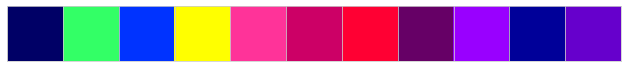

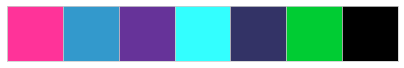

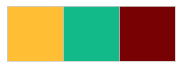

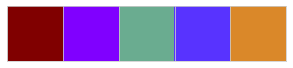

In [7]:
# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set Color Palettes for the notebook
color_palette_1 = ['#000066', '#33FF66', "#0033FF", "#FFFF00", "#FF3399", 
                   "#CC0066", "#FF0033", "#660066","#9900FF" ,"#000099", "#6600CC"]
sns.palplot(sns.color_palette(color_palette_1))

# Set Color Palettes for the notebook
color_palette_2 = ["#FF3399", "#3399CC", "#663399", "#33FFFF", "#333366", "#00CC33", "#000000"]
sns.palplot(sns.color_palette(color_palette_2))

color_palette_3 = ["#FFBE33","#12BA8A","#780103"]
sns.palplot(sns.color_palette(color_palette_3))

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
sns.palplot(sns.color_palette(color_palette))

In [8]:
# numerical_features = ["Age","Resting_BP","Cholestrol","Heart_rate","ST_depression"]
def UDA_numeric(num_feature,color, dpi,rotation):
    """This function will plot all the statistical descritive properties and properties also with KDE"""
    fig,ax=plt.subplots(figsize=(16,6),dpi=dpi)
    sns.distplot(x=dataset[num_feature], bins =10,ax=ax, color=color,hist_kws={"edgecolor":"black"})

        ## Descriptive statistics
    minimum = dataset[num_feature].min()
    maximum = dataset[num_feature].max()
    range = maximum - minimum
    mean = dataset[num_feature].mean()
    median = dataset[num_feature].median()
    std_dev = dataset[num_feature].std()
    skewness = dataset[num_feature].skew()
    kurtosis = dataset[num_feature].kurt()

    points = mean-std_dev, mean + std_dev

    ax.set_title("std_dev={}; kurtosis ={};\nskewness = {}; range = {}\nmean ={}; median = {}".format((round(points[0],2),round(points[1],2)),
                                                                                               round(kurtosis,2),
                                                                                               round(skewness,2),
                                                                                               (round(minimum,2),round(maximum,2),round(range,2)),
                                                                                               round(mean,2),
                                                                                               round(median,2)),fontsize=18)
    ax.set_xlabel(f"{num_feature}", fontsize=20)
    ax.set_ylabel("Frequency", fontsize=20)
    ax.tick_params(axis = "both",which="major", labelsize = 20)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([minimum,maximum], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.axvline(np.mean(dataset[num_feature]), color = "k", linestyle = 'dashed', linewidth = 2)
    _, max_ = plt.ylim()
    plt.text(
    dataset[num_feature].mean() + dataset[num_feature].mean()/10,
    max_ - max_/10,
    "Mean:{:.2f}".format(dataset[num_feature].mean()),
    )


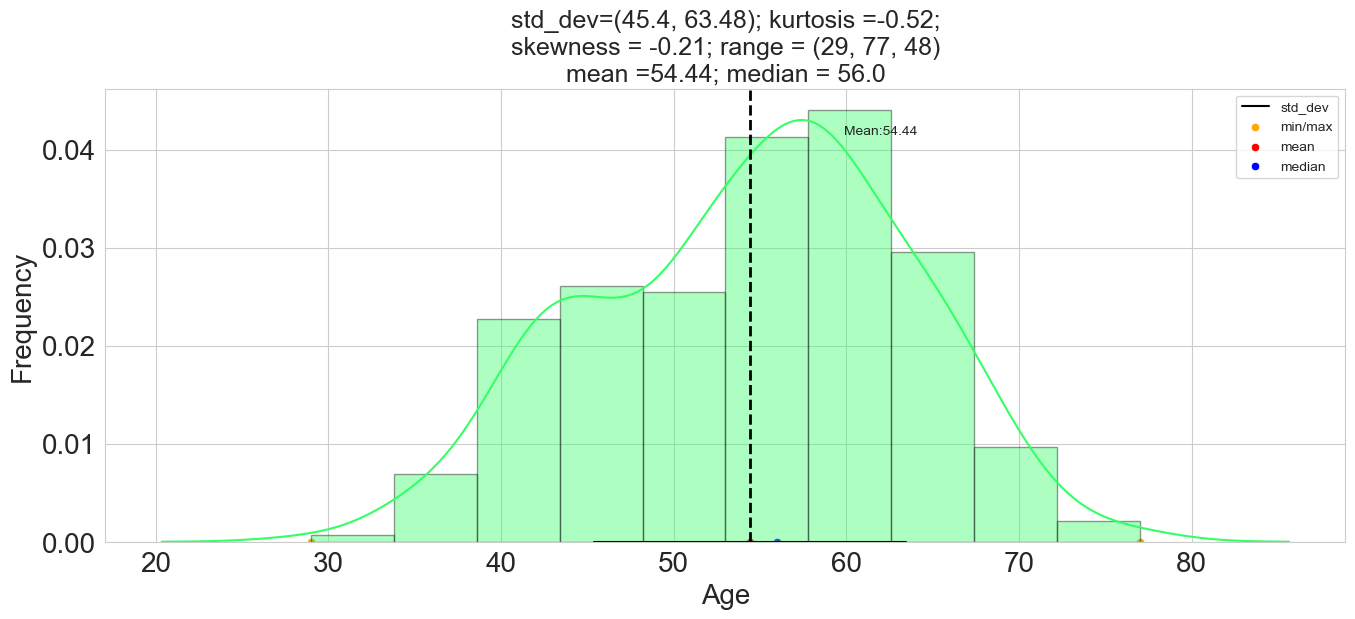

In [9]:
UDA_numeric("Age",color_palette_1[1],100,0)
plt.savefig("Age_univariate")

**Age**
* Median Age is 56 years.
* Most of the people are in the age group of 45 to 63
* Skewness is -0.21 means age is left skewed i.e. people at young ages are most prevalent to heart disease.
* Kurtosis is -0.52; very less likely to have extreme/outlier values.

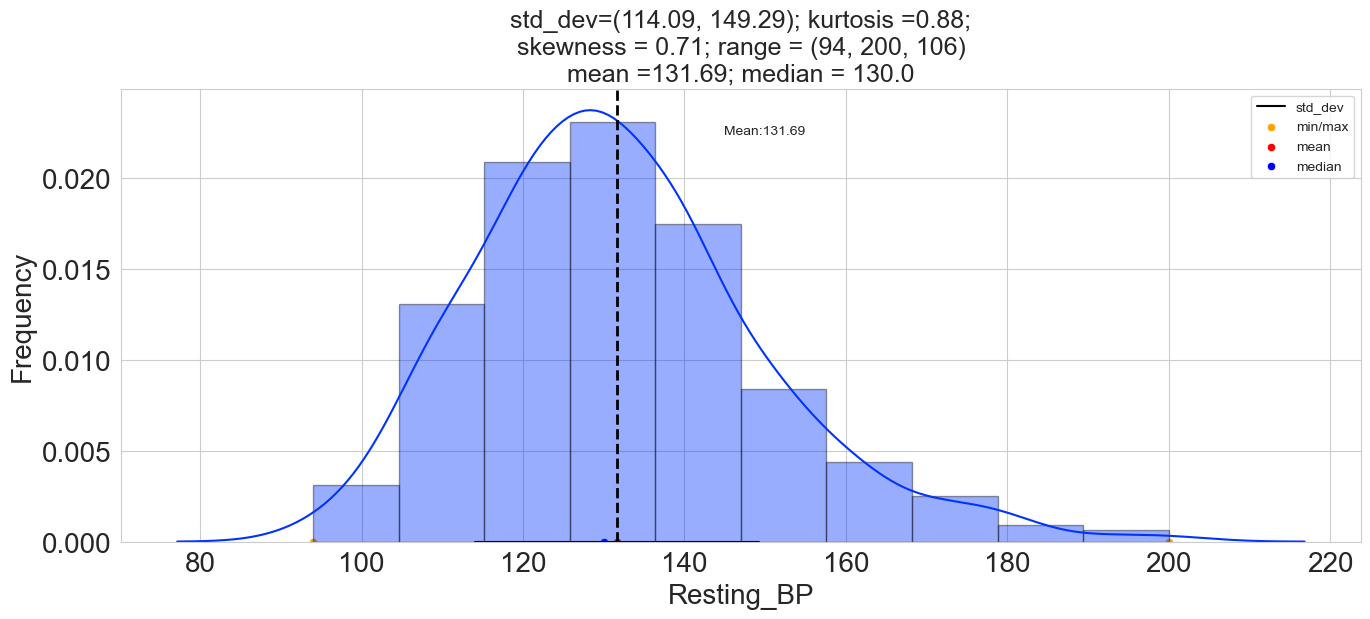

In [10]:
UDA_numeric("Resting_BP",color_palette_1[2],100,0)
plt.savefig("Resting_BP_Univariate")

**Resting_BP**
* Average Blood pressure is 131 which indicates **stage 1 hypertension**.
* Most of the people are in (114,149) Blood Pressure group.
* Skewness is 0.71 which is right skewed i.e. more people has higher BP 
* Kurtosis is 0.88 i.e. dataset has lighter tail and high peak than normal distribution

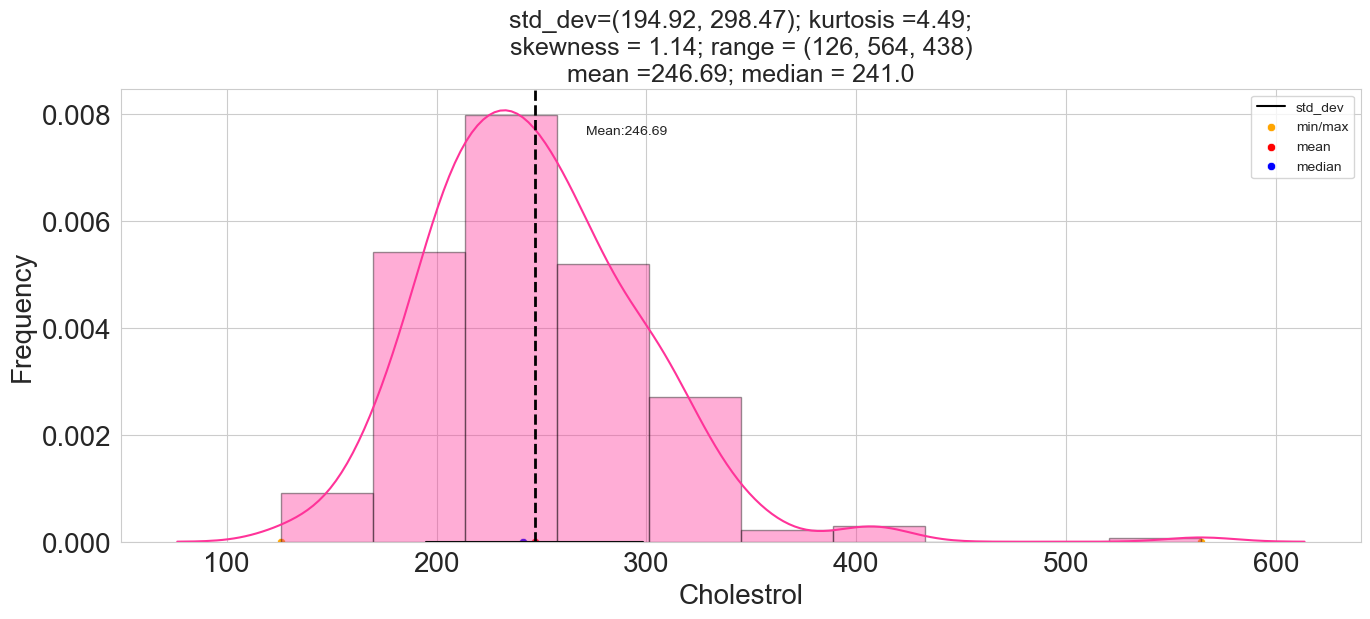

In [11]:
UDA_numeric("Cholestrol",color_palette_1[4],100,0)
plt.savefig("Cholestrol_Univariate")

**Cholestrol**
* Average Cholestrol has 246 mg/dl indicating people has **Dangerous Cholestrol Level**
* Most of the people has cholestrol level in between 195 mg/dl and 298 mg/dl.
* Skewness is 1.14 indicating it is **highly skewed towards right** because of some people has very high cholestrol
* Kurtosis is 4.49 indicating extreme values and outliers are very likely to be present in Cholestrol.


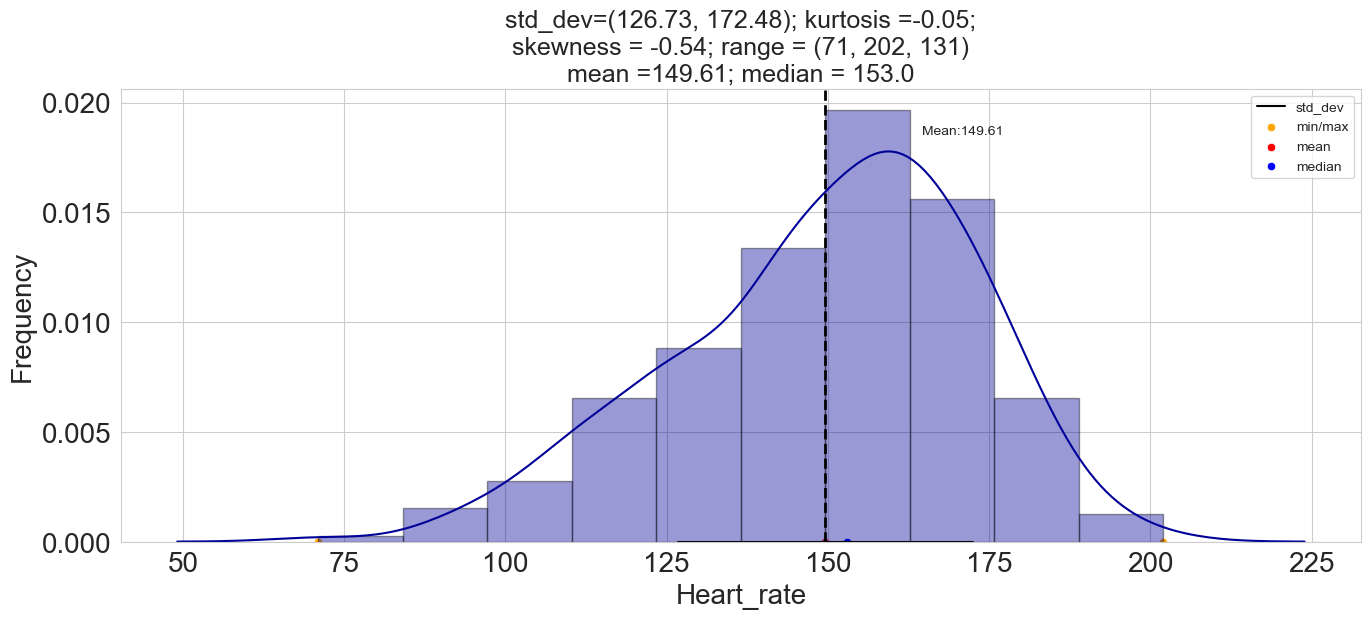

In [12]:
UDA_numeric("Heart_rate",color_palette_1[9],100,0)
plt.savefig("Heart_rate_Univariate")

**Heart Rate**
* Average heart rate is 149bpm
* minimum and maximum heart rate is 71 bpm and 202 bpm

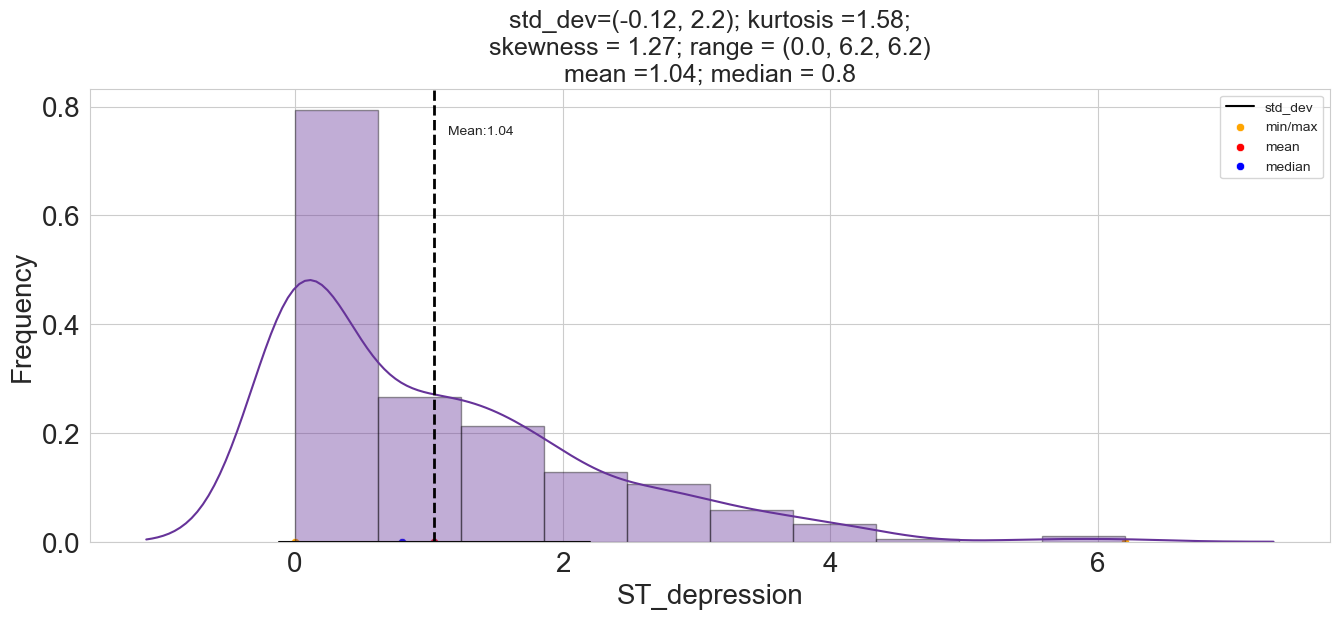

In [13]:
UDA_numeric("ST_depression",color_palette_2[2],100,0)
plt.savefig("ST_depression_Univariate")

**ST_depression**
* Mean value is 1.06 which suggest that ST_depression is normal.
* Skewness values suggest that it is highly right skewed.
* Kurtosis value is less than 3 which suggest that it has fewer outliers.

###### 4.3 UDA: Categorical Features

In [14]:
dataset.select_dtypes(exclude=["int64","float64"]).dtypes

Gender                object
Chest_pain            object
Blood_sugar           object
Resting_ECG           object
Exer_induced_agina    object
Slope_STsegment       object
Coronary Angiogram    object
Thallium_result       object
Heart_disease         object
dtype: object

In [15]:
def UDA_category(cat_feature1,cat_feature2,color1, color2,dpi, rotation, xlabel_fontsize):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,6),dpi = dpi)
    a=sns.countplot(dataset[cat_feature1],ax=ax1, palette = color1)
    for i in a.patches:
        a.annotate(format(i.get_height(),","),
                  (i.get_x()+i.get_width()/2.,i.get_height()),ha='center',va='center',xytext=(0,4),textcoords='offset points', fontsize=20)
        #ax1.title(f"Barplot of {cat_feature1}", fontsize = 20)
        ax1.set_xlabel(f"{cat_feature1}", fontsize=20)
        ax1.set_ylabel("Count", fontsize=20)
        ax1.tick_params(axis = "y", which="major", labelsize = 20)
        ax1.tick_params(axis="x",labelrotation=rotation, labelsize=xlabel_fontsize)
    
    b=sns.countplot(dataset[cat_feature2],ax=ax2, palette = color2)
    for j in b.patches:
        b.annotate(format(j.get_height(),","),
                  (j.get_x()+j.get_width()/2.,j.get_height()),ha='center',va='center',xytext=(0,4),textcoords='offset points', fontsize=20)
        #ax2.title(f"Barplot of {cat_feature2}", fontsize = 20)
        ax2.set_xlabel(f"{cat_feature2}", fontsize=20)
        ax2.set_ylabel("Count", fontsize=20)
        ax2.tick_params(axis = "y", which="major", labelsize = 20)
        ax2.tick_params(axis="x", labelrotation=rotation, labelsize = xlabel_fontsize)

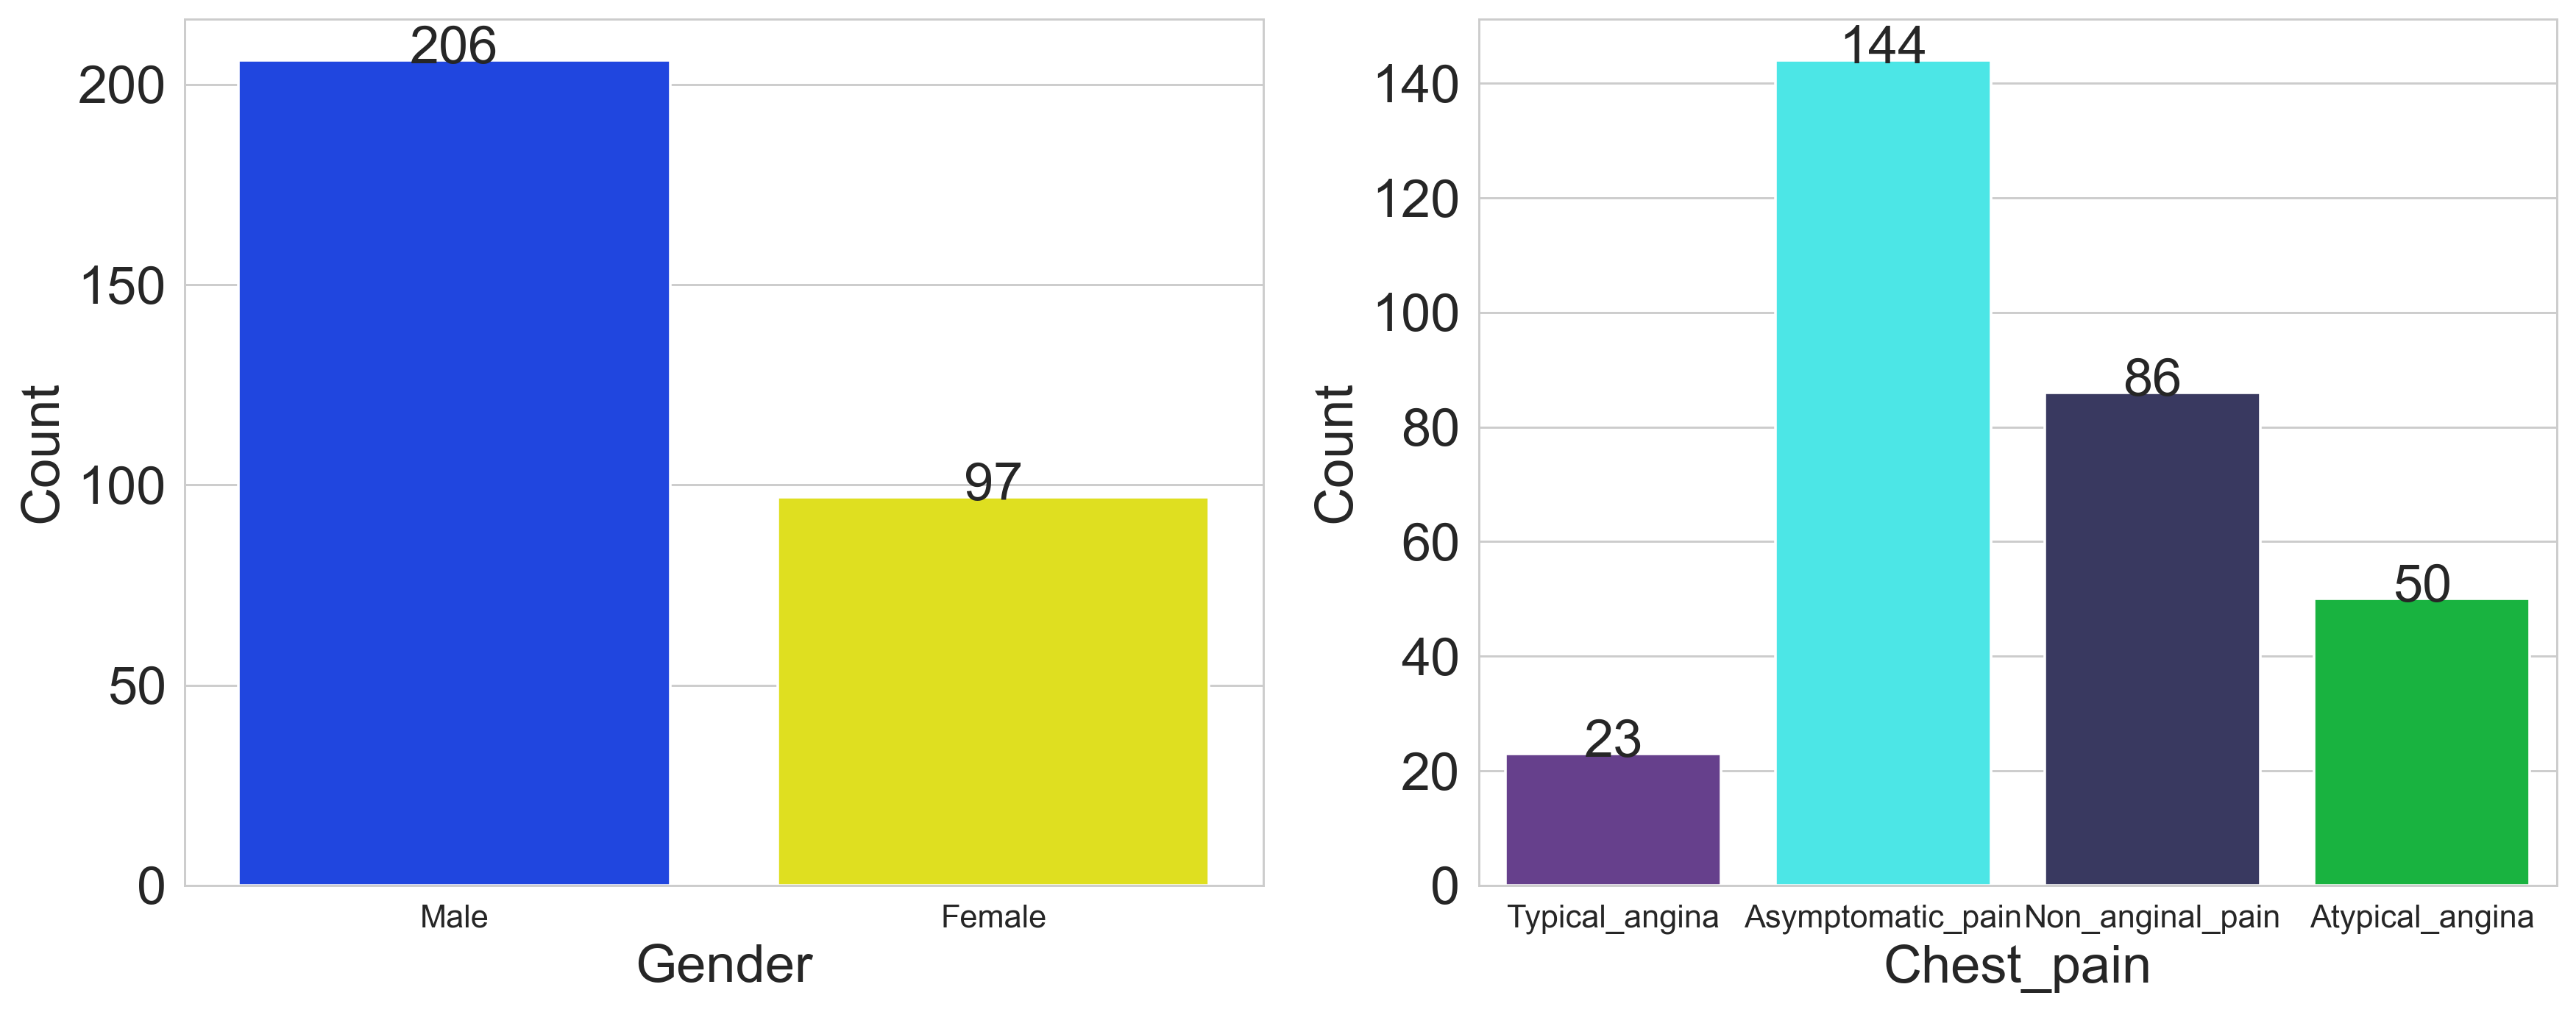

In [16]:
UDA_category("Gender","Chest_pain",color_palette_1[2:4],color_palette_2[2:6],260,0,12)
plt.savefig("Gender and Chest_pain")

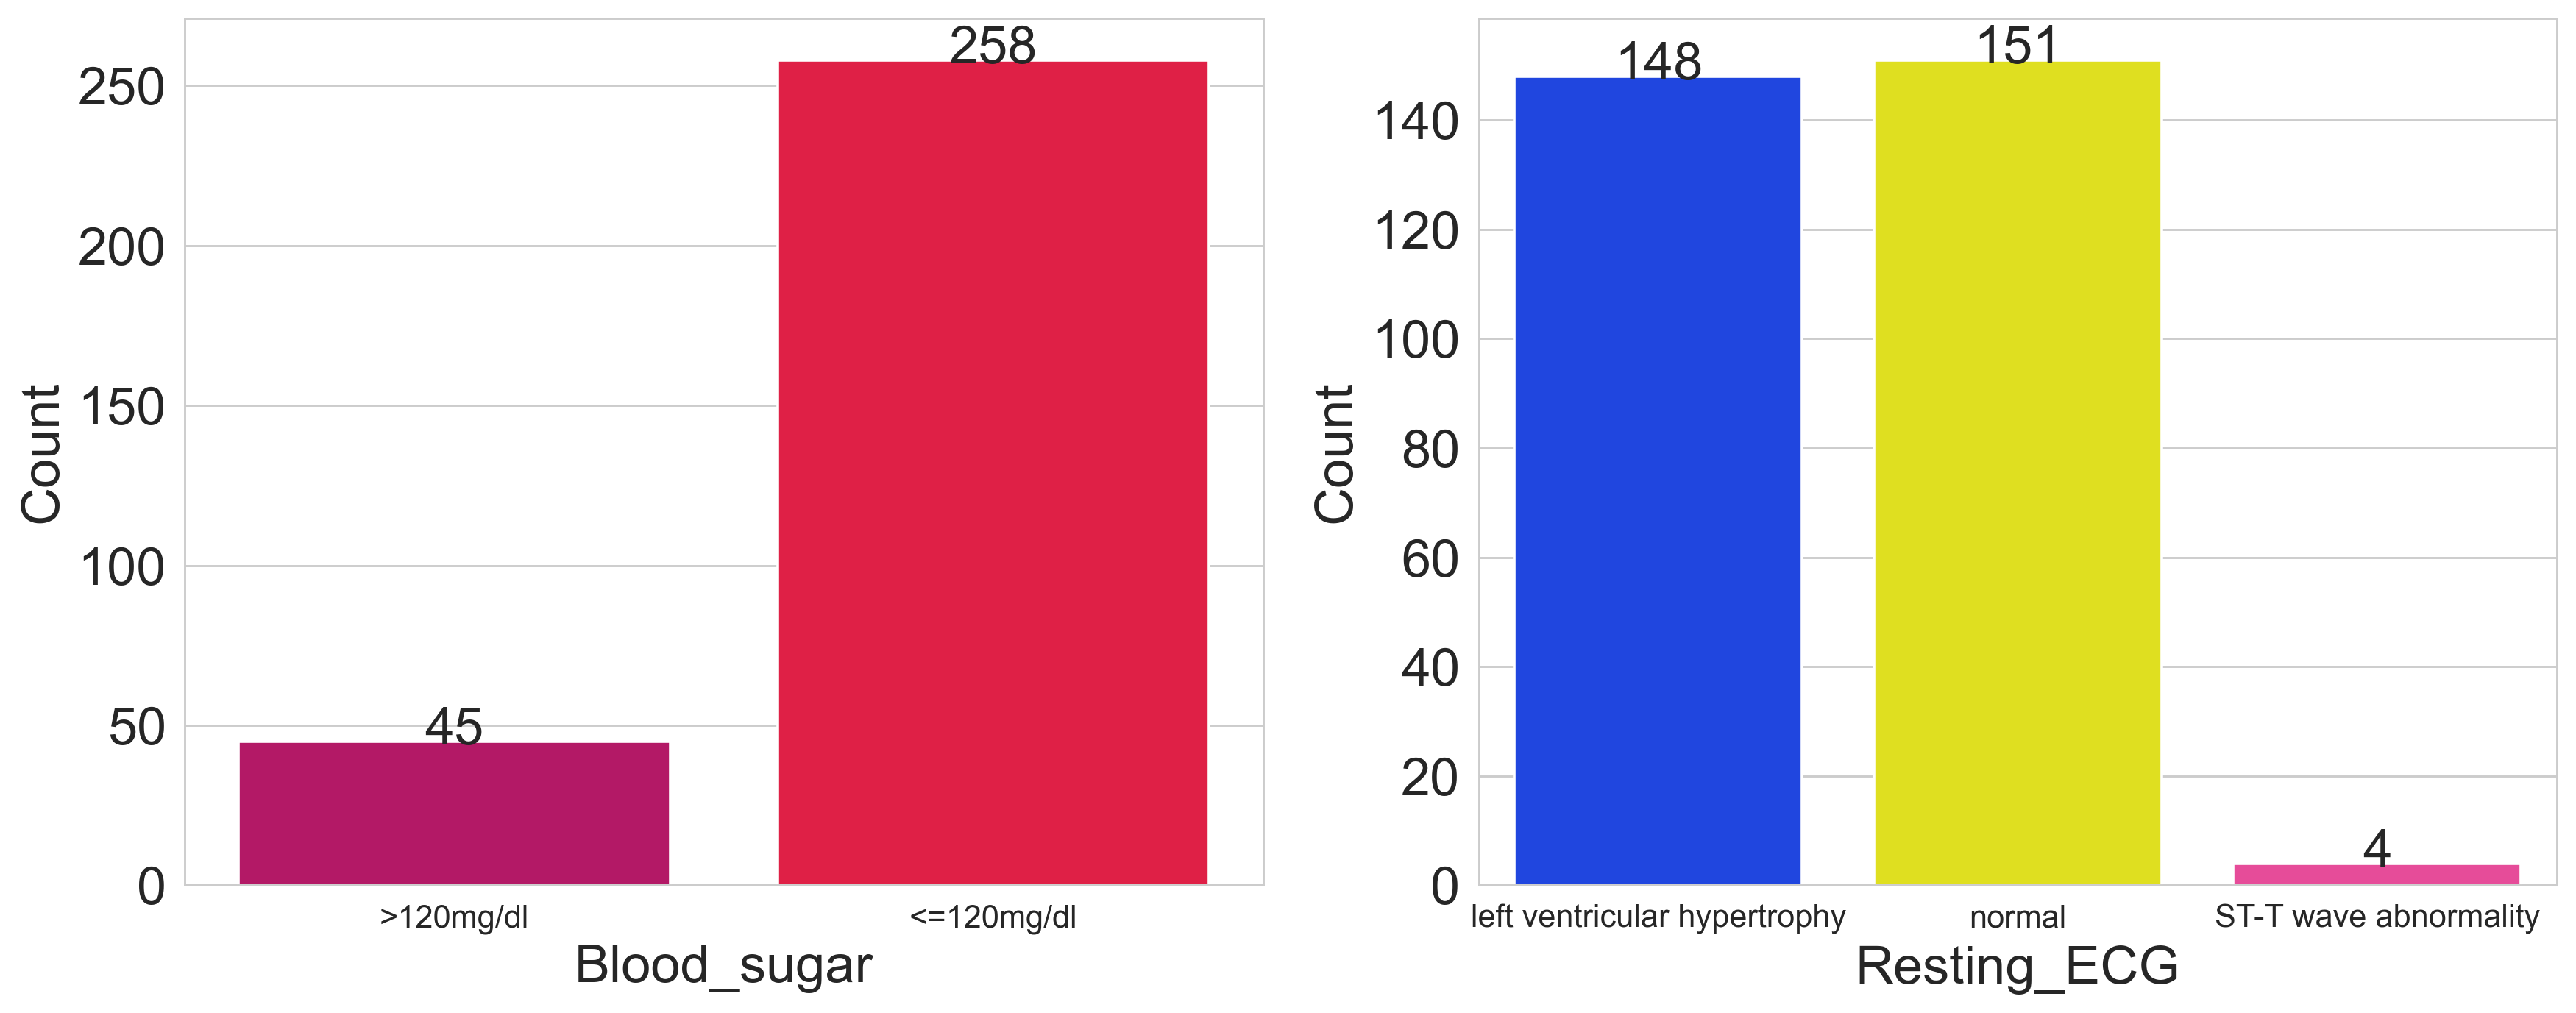

In [17]:
UDA_category("Blood_sugar","Resting_ECG",color_palette_1[5:7],color_palette_1[2:5],260,0,12)
plt.savefig("Blood_sugar and Resting_ECG")

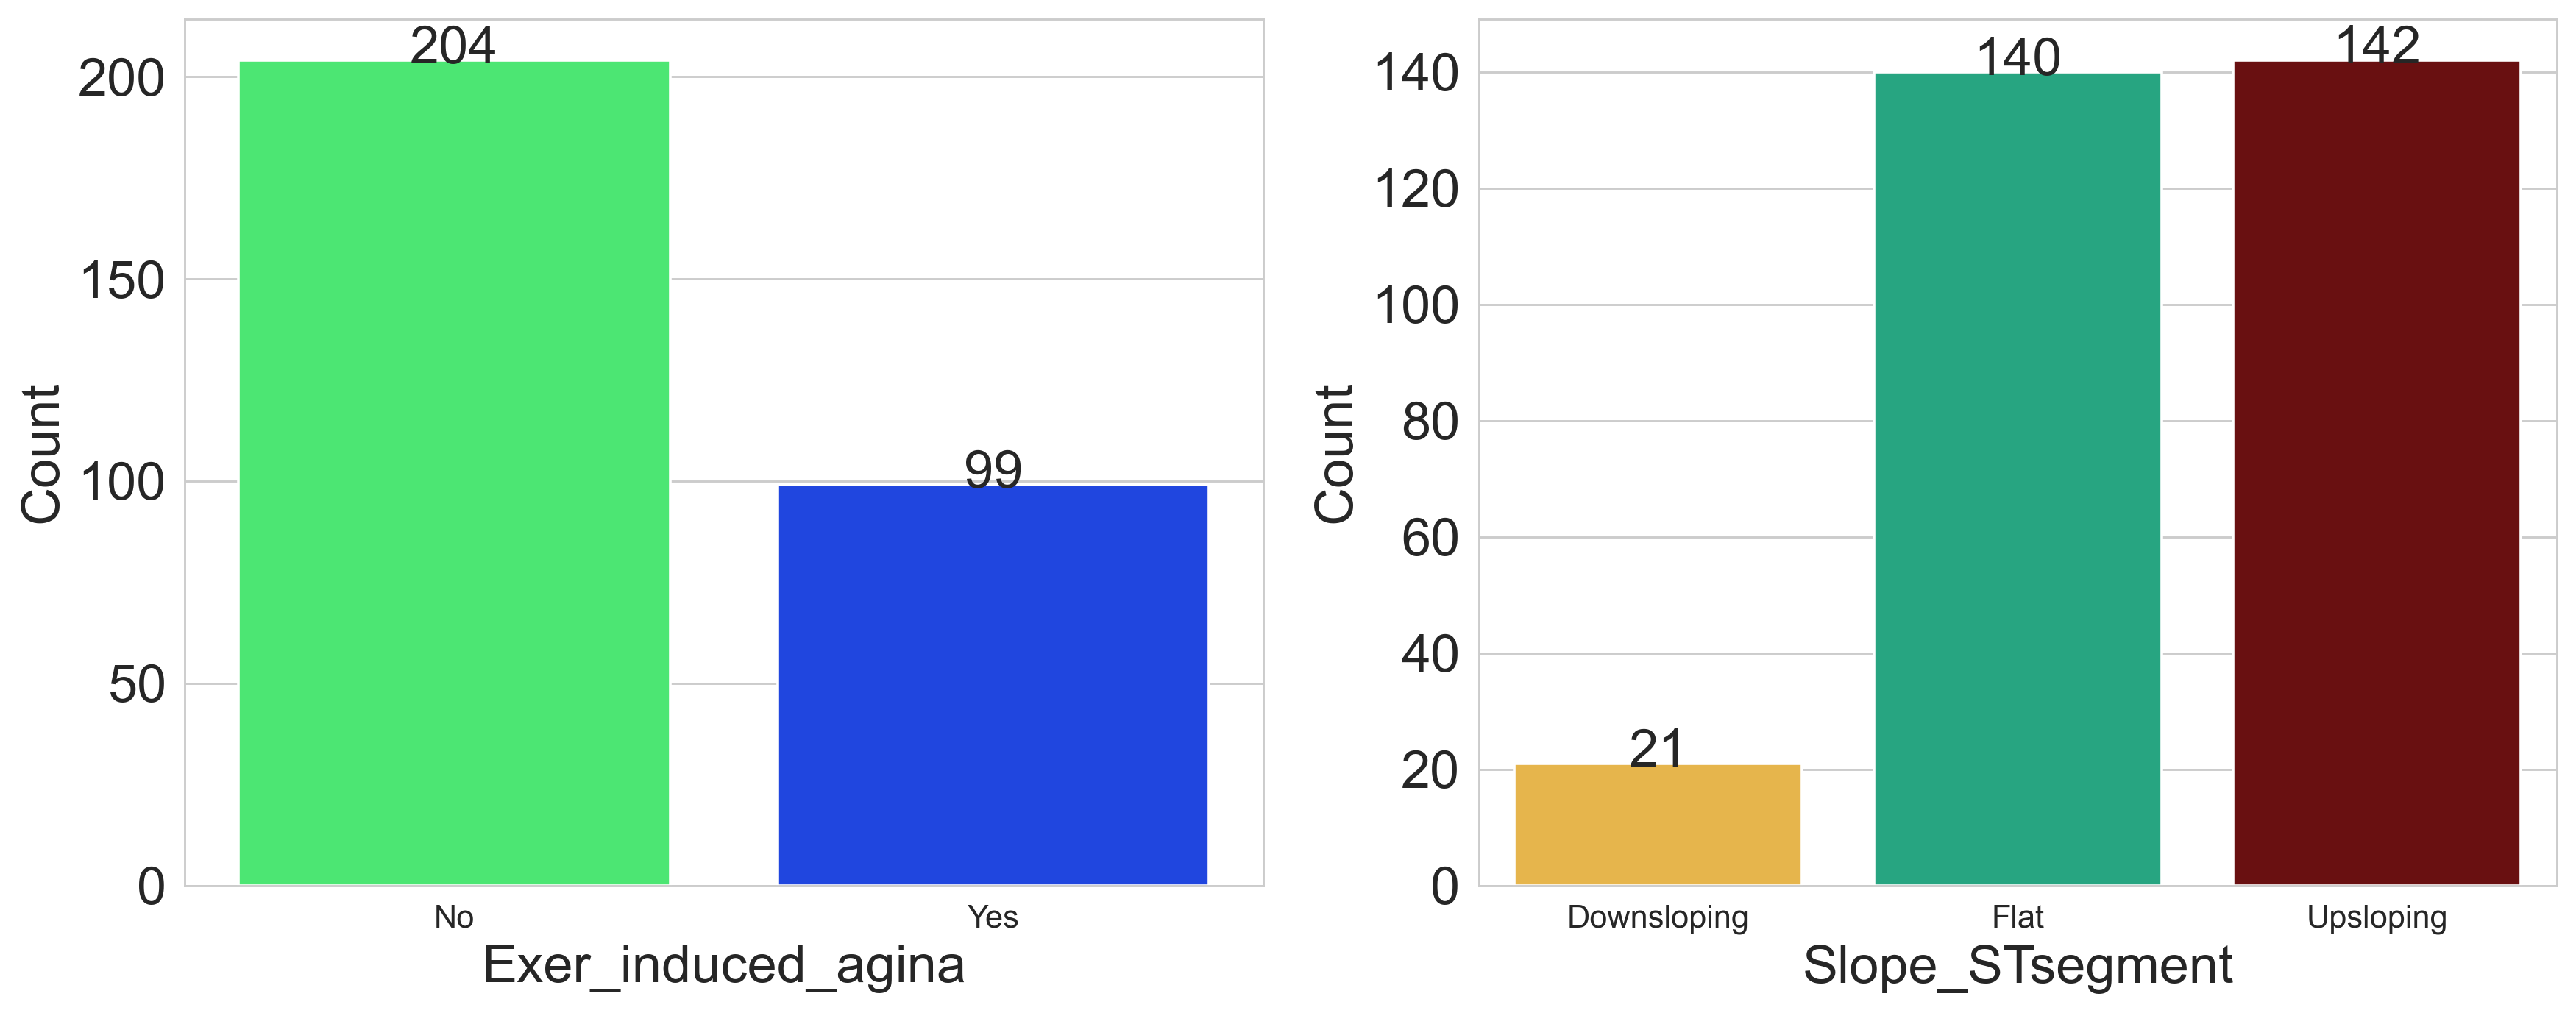

In [18]:
UDA_category("Exer_induced_agina","Slope_STsegment",color_palette_1[1:3],color_palette_3[0:3],260,0,12)
plt.savefig("Exer_induced_agina and Slope_STsegment")

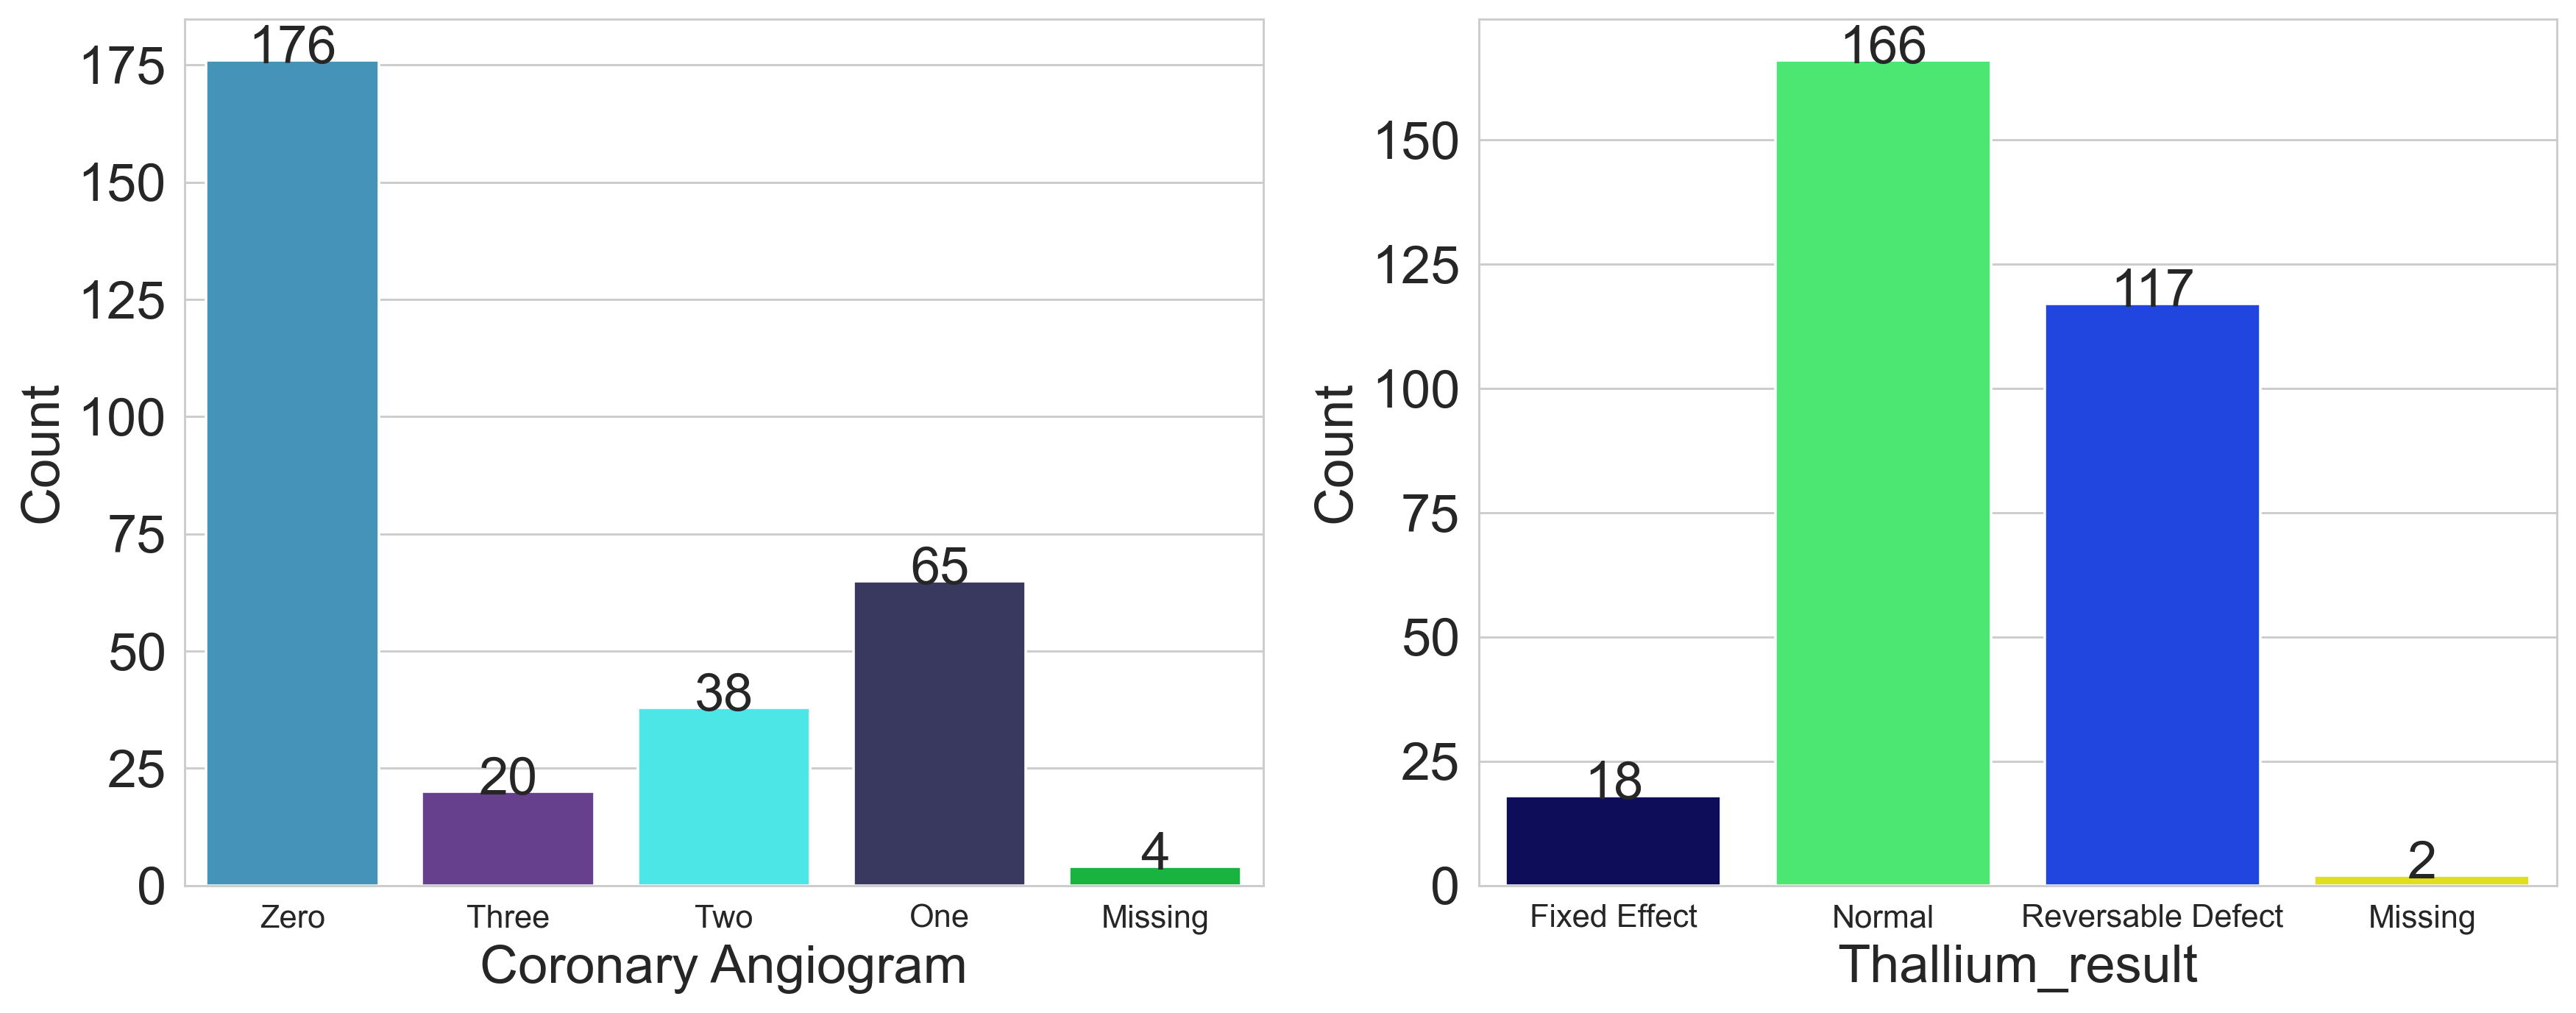

In [19]:
UDA_category("Coronary Angiogram","Thallium_result",color_palette_2[1:],color_palette_1[:],260,0,12)
plt.savefig("Coronary Angiogram and Thallium_result")

## Analysis Based on Heart Disease present

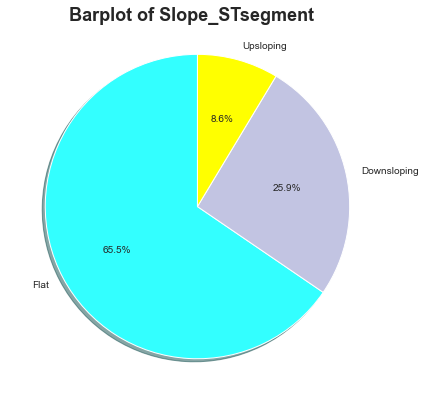

<Figure size 432x288 with 0 Axes>

In [614]:
plt.figure(figsize=(7,7))
plt.suptitle("Barplot of Slope_STsegment",y=0.9,size=18, weight='bold')

labels=["Flat","Downsloping","Upsloping"]
sizes = new_dataset_1["Slope_STsegment"].value_counts(sort=True)
colors = ["#33FFFF","#C2C4E2","#FFFF00"]
plt.pie(sizes,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
plt.savefig("Slope_STsegment_piechart")

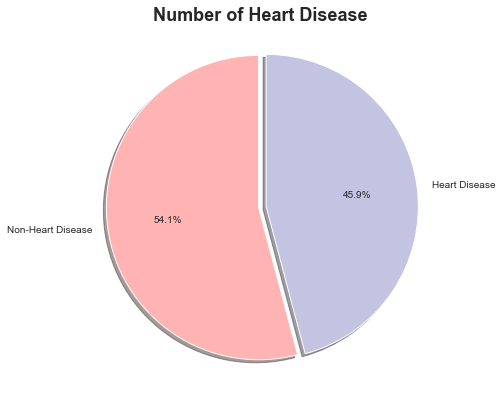

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(7,7))
plt.suptitle("Number of Heart Disease",y=0.9,size=18, weight='bold')

labels=["Non-Heart Disease","Heart Disease"]
sizes = dataset["Heart_disease"].value_counts(sort=True)
colors = ["#ffb3b3","#C2C4E2"]
explode = (0.05,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
plt.savefig("HeartDisease_Univariate")

**Observation of Categorical Variable**
- Most number of people have heart disease are male(201) followed by female(96).
- Asymptomatic_pain(142) is most prevalent Chest_pain among all pain category.
- Left venticular hypertrophy & normal are the highest among all Resting_ECG category.
- Large number of people says they don't have the Exercise induced agina i.e. the pain occur with exercise or stress.
- The distribution of Flat and Upsloping is almost same while downsloping is the lowest of all.
- People with zero coronary Angiogram is the highest distribution of all.
- Patient with Normal thallium_result is the highest among all category
- When Age is more than 54, the heart disease is more likely to present compared to all other age category.
- When blood_sugar is leass than 120mg/dl then chances of being a person has heart disease is preferably more compared to other
- When slope_STsegment is Flat then presence of heart disease is more likely to be present compared to all the other category
- In our dataset around 46% people has heart disease.


##### 4.4 Outliers

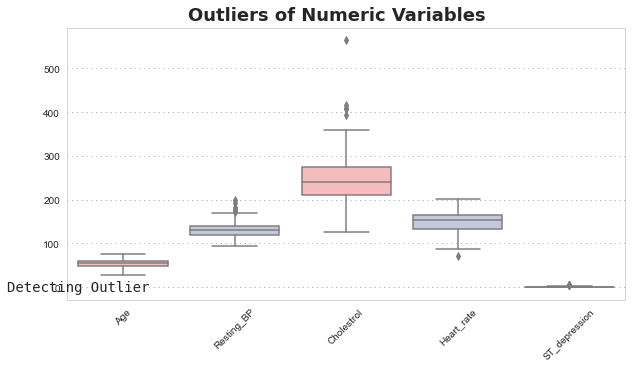

In [35]:
numerical = ["Age","Resting_BP","Cholestrol", "Heart_rate","ST_depression"]
plt.figure(figsize=(10,5))
plt.suptitle("Outliers of Numeric Variables",y=0.94, family='Sherif', size=18, weight='bold')
plt.text(-0.4, 1.64, 'Detecting Outlier', horizontalalignment='center',verticalalignment='center',size=14,fontweight='light', fontfamily='monospace')
sns.boxplot(data = dataset[numerical],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

As we can see there are some outliers present in the numerical features of the dataset, but we will not removing these outlier.

## 5. Bivariate  Data Analysis

###### 5.1 Correlation 

In [28]:
dataset.corr().transpose()

,Age,Resting_BP,Cholestrol,Heart_rate,ST_depression
Age,1.000000,0.284946,0.208950,-0.393806,0.203805
Resting_BP,0.284946,1.000000,0.130120,-0.045351,0.189171
Cholestrol,0.208950,0.130120,1.000000,-0.003432,0.046564
Heart_rate,-0.393806,-0.045351,-0.003432,1.000000,-0.343085
ST_depression,0.203805,0.189171,0.046564,-0.343085,1.000000


Text(0.5, 1.0, 'Relationship between Age and Resting Blood Pressure')

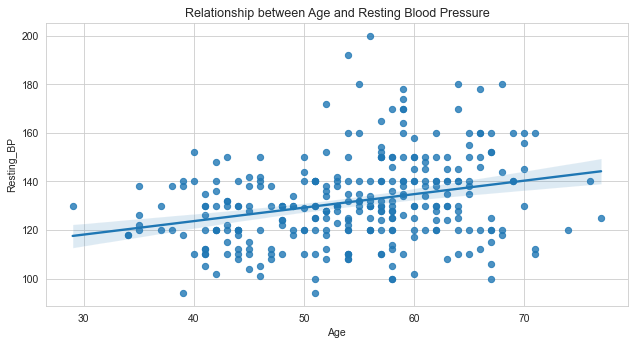

In [37]:
plt.figure(figsize=(10,5),dpi=75)
sns.regplot(data=dataset,x="Age",y="Resting_BP")
plt.title("Relationship between Age and Resting Blood Pressure")

As we can see that there is a slight positive correlation between Age and Resting BP. It means as age tends to increases, Blood pressure also increases

<AxesSubplot:title={'center':'Correlation Matrix'}>

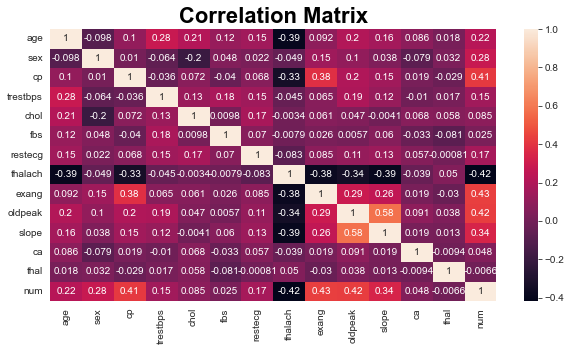

In [61]:
fig = plt.figure(figsize=(10,5))
#color_palette = ["#5833ff","#da8829"]
plt.title("Correlation Matrix",fontsize=22,fontweight="bold",color = "#000000")
df_corr = dataset.corr().transpose()
sns.heatmap(df_corr,annot=True)

It was found that the variables
induced angia (exang), chest pain type (cp), ST
depression induced by exercise relative to rest
(oldpeak), maximal heart rate (thalac) had a strong
correlation with the target variable. Meanwhile, blood
sugar (fbs) and cholesterol (chol) levels do not
correlate with the target variable. Meanwhile, among
the independent variables, there is a strong correlation
between the slope and oldpeak variables. Besides,
thalac, exhang, oldpeak, and slope variables are also
strongly correlated. Strong correlation also applies to
variables Exang, cp, and thalac. It proves that there is
**no multicollinearity in the relationship between
variables where each independent variable does not
correlate with each other**.

###### 5.2 Categorical Variable Analysis & Chi-Square Test

In [618]:
def bivariate_analysis(cat1,cat2,cat1_color, cat2_color, dpi, rotation1,rotation2, xlabel_fontsize1,xlabel_fontsize2):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,6),dpi = dpi)
    a=sns.countplot(dataset[cat1],hue=dataset["Heart_disease"],ax=ax1, palette = cat1_color)
    for i in a.patches:
        a.annotate(format(i.get_height(),","),
                  (i.get_x()+i.get_width()/2.,i.get_height()),ha='center',va='center',xytext=(0,4),textcoords='offset points', fontsize=20)
        ax1.set_title(f"Heart Disease Distribution based on {cat1}", fontsize = 20)
        ax1.set_xlabel(f"{cat1}", fontsize=20)
        ax1.set_ylabel("Frequency", fontsize=20)
        ax1.tick_params(axis = "both", which="major", labelsize = xlabel_fontsize1)
        ax1.tick_params(axis="x",labelrotation=rotation1)
    
    b=sns.countplot(dataset[cat2],hue=dataset["Heart_disease"],ax=ax2, palette = cat2_color)
    for j in b.patches:
        b.annotate(format(j.get_height(),","),
                  (j.get_x()+j.get_width()/2.,j.get_height()),ha='center',va='center',xytext=(0,4),textcoords='offset points', fontsize=20)
        ax2.set_title(f"Heart Disease Distribution based on {cat2}", fontsize = 20)
        ax2.set_xlabel(f"{cat2}", fontsize=20)
        ax2.set_ylabel("Frequency", fontsize=20)
        ax2.tick_params(axis = "y", which="major", labelsize = xlabel_fontsize2)
        ax2.tick_params(axis="x", labelrotation=rotation2)

In [619]:
def chi_square_test(categorical_var):
    print("---------Hypothesis----------")
    print(f"H0(Null Hypothesis) = Heart disease does not dependent on {categorical_var}")
    print(f"H1(Alternative Hypothesis)= Heart disease is influenced by {categorical_var}")
    """This function returns whether the given categorical variable has any influence on output variable """
    print('-----------------------------TABLE-------------------------------')
    table = pd.crosstab(dataset[categorical_var],dataset["Heart_disease"],margins = True)
    print(table)
    Critical_val, p, dof, expected = stats.chi2_contingency(table)
    print('-----------------------------Statistic---------------------------')
    print(f"p-value is {round(p,2)} & critical value is {round(Critical_val,2)}")
    prob = 0.95
    alpha = 1-prob
    if p<=alpha:
        print("Dependent(reject H0)")
        print(f"{categorical_var} is an important feature in influencing heart disease")
    else:
        print('Independent(Accept H0)')
        print(f"{categorical_var} is not so important for heart disease")

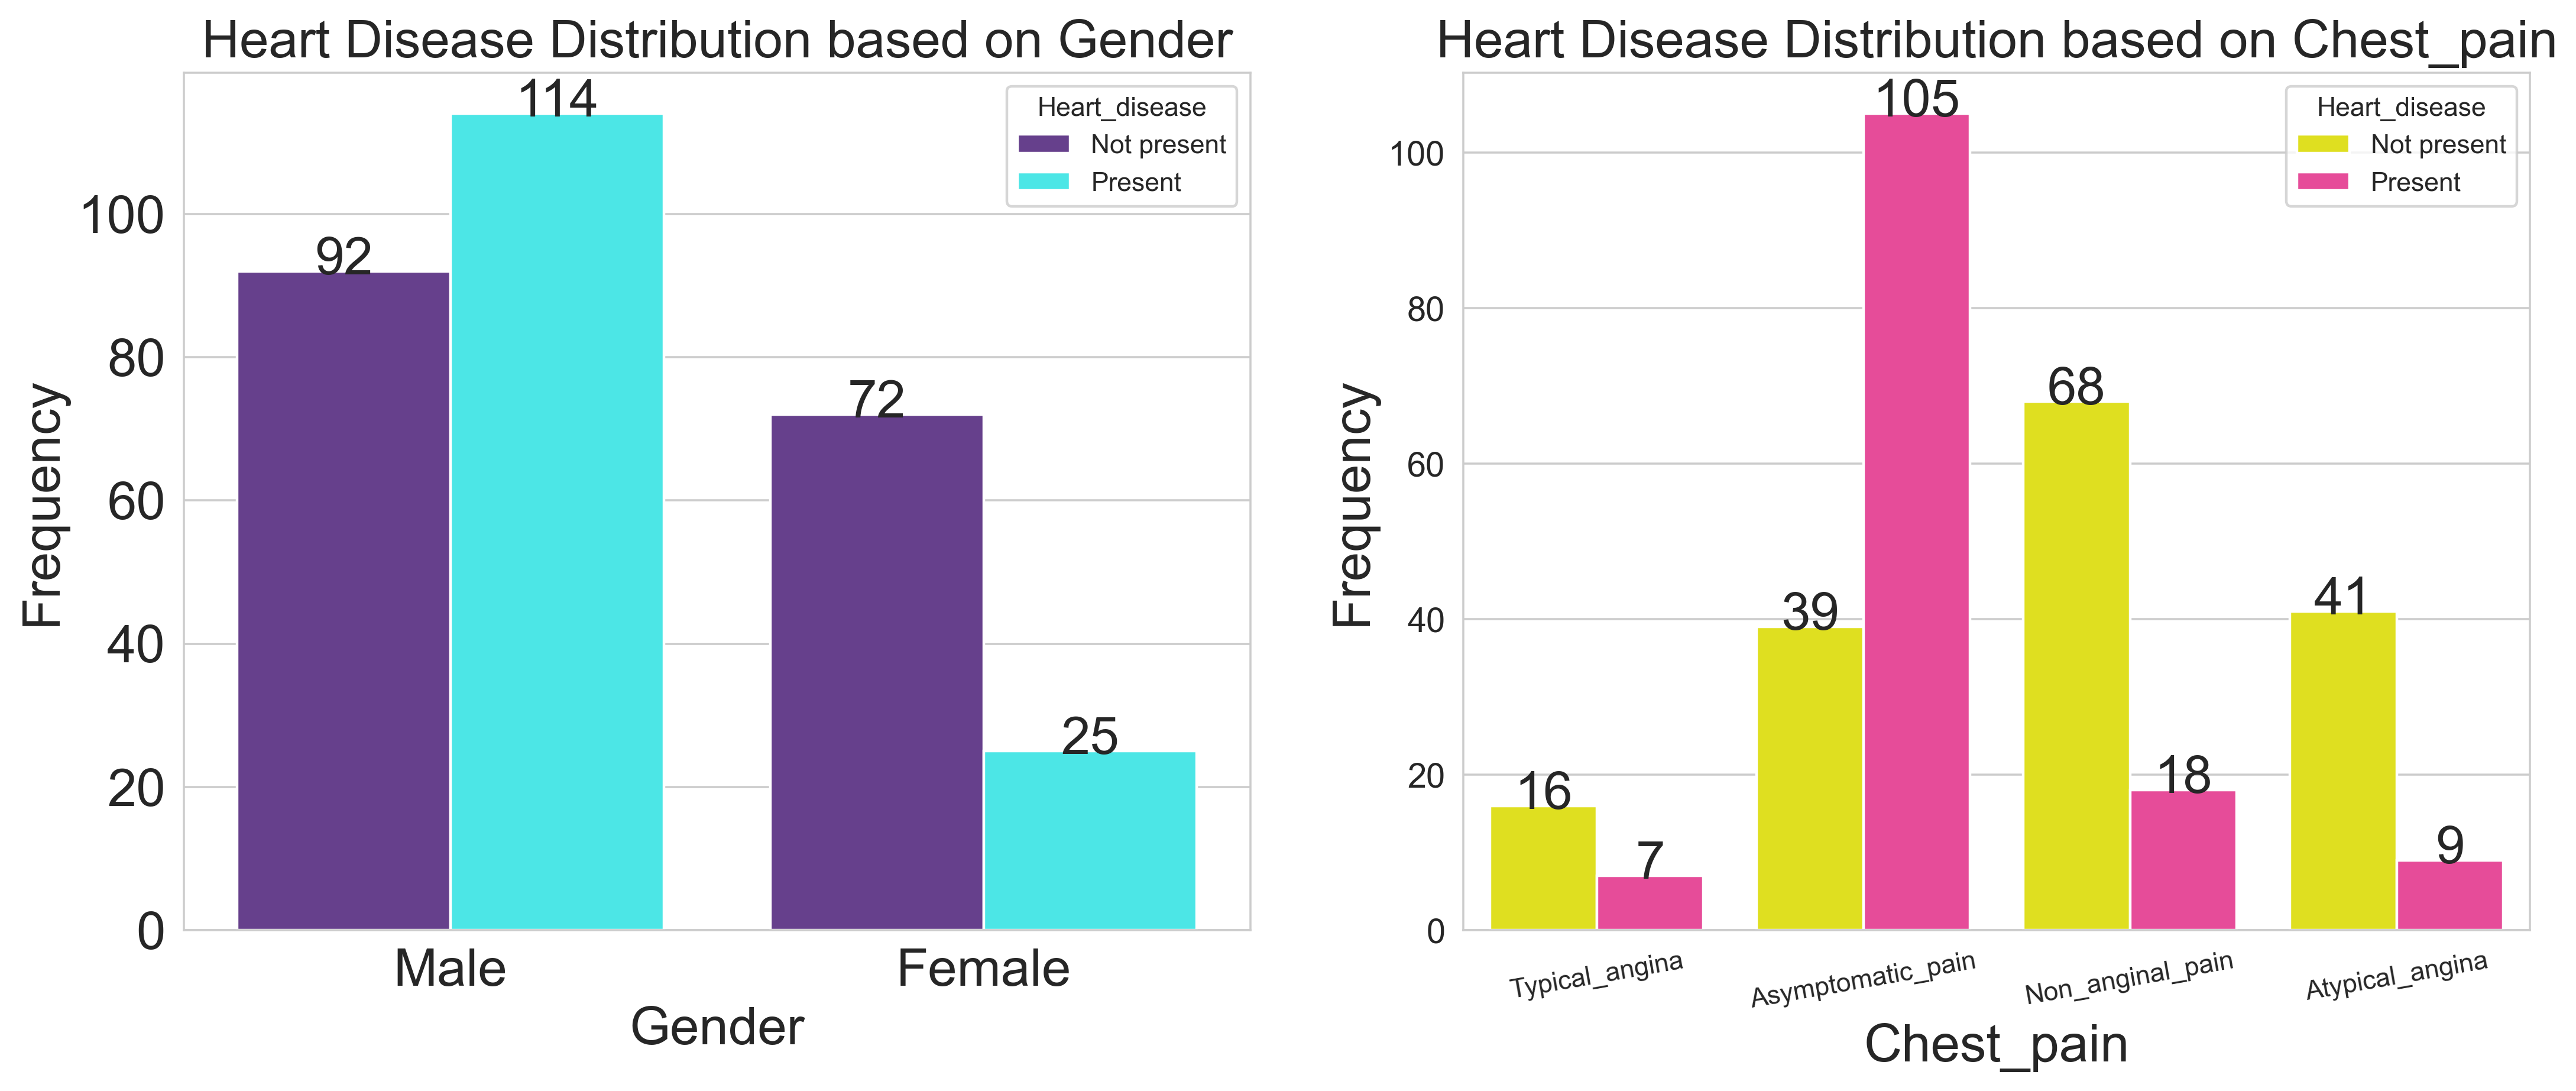

In [620]:
bivariate_analysis("Gender","Chest_pain",color_palette_2[2:4],color_palette_1[3:6],320,0,10,20,13)
plt.savefig("Gender and Chest_pain on Heart_disease_Bivariate")

In [621]:
chi_square_test("Gender")

---------Hypothesis----------
H0(Null Hypothesis) = Heart disease does not dependent on Gender
H1(Alternative Hypothesis)= Heart disease is influenced by Gender
-----------------------------TABLE-------------------------------
Heart_disease  Not present  Present  All
Gender                                  
Female                  72       25   97
Male                    92      114  206
All                    164      139  303
-----------------------------Statistic---------------------------
p-value is 0.0 & critical value is 23.22
Dependent(reject H0)
Gender is an important feature in influencing heart disease


In [622]:
chi_square_test("Chest_pain")

---------Hypothesis----------
H0(Null Hypothesis) = Heart disease does not dependent on Chest_pain
H1(Alternative Hypothesis)= Heart disease is influenced by Chest_pain
-----------------------------TABLE-------------------------------
Heart_disease      Not present  Present  All
Chest_pain                                  
Asymptomatic_pain           39      105  144
Atypical_angina             41        9   50
Non_anginal_pain            68       18   86
Typical_angina              16        7   23
All                        164      139  303
-----------------------------Statistic---------------------------
p-value is 0.0 & critical value is 81.82
Dependent(reject H0)
Chest_pain is an important feature in influencing heart disease


**Inference**
* Again we found that male patient or people are mostly affected by heart disease, which we can also seen from critical value of Gender.
* Asymptomatic chest pain is the main reason of heart disease among all types of chest pains. Chest pain is very important factor in explaining the heart disease indicated by a very high chi-square critical value

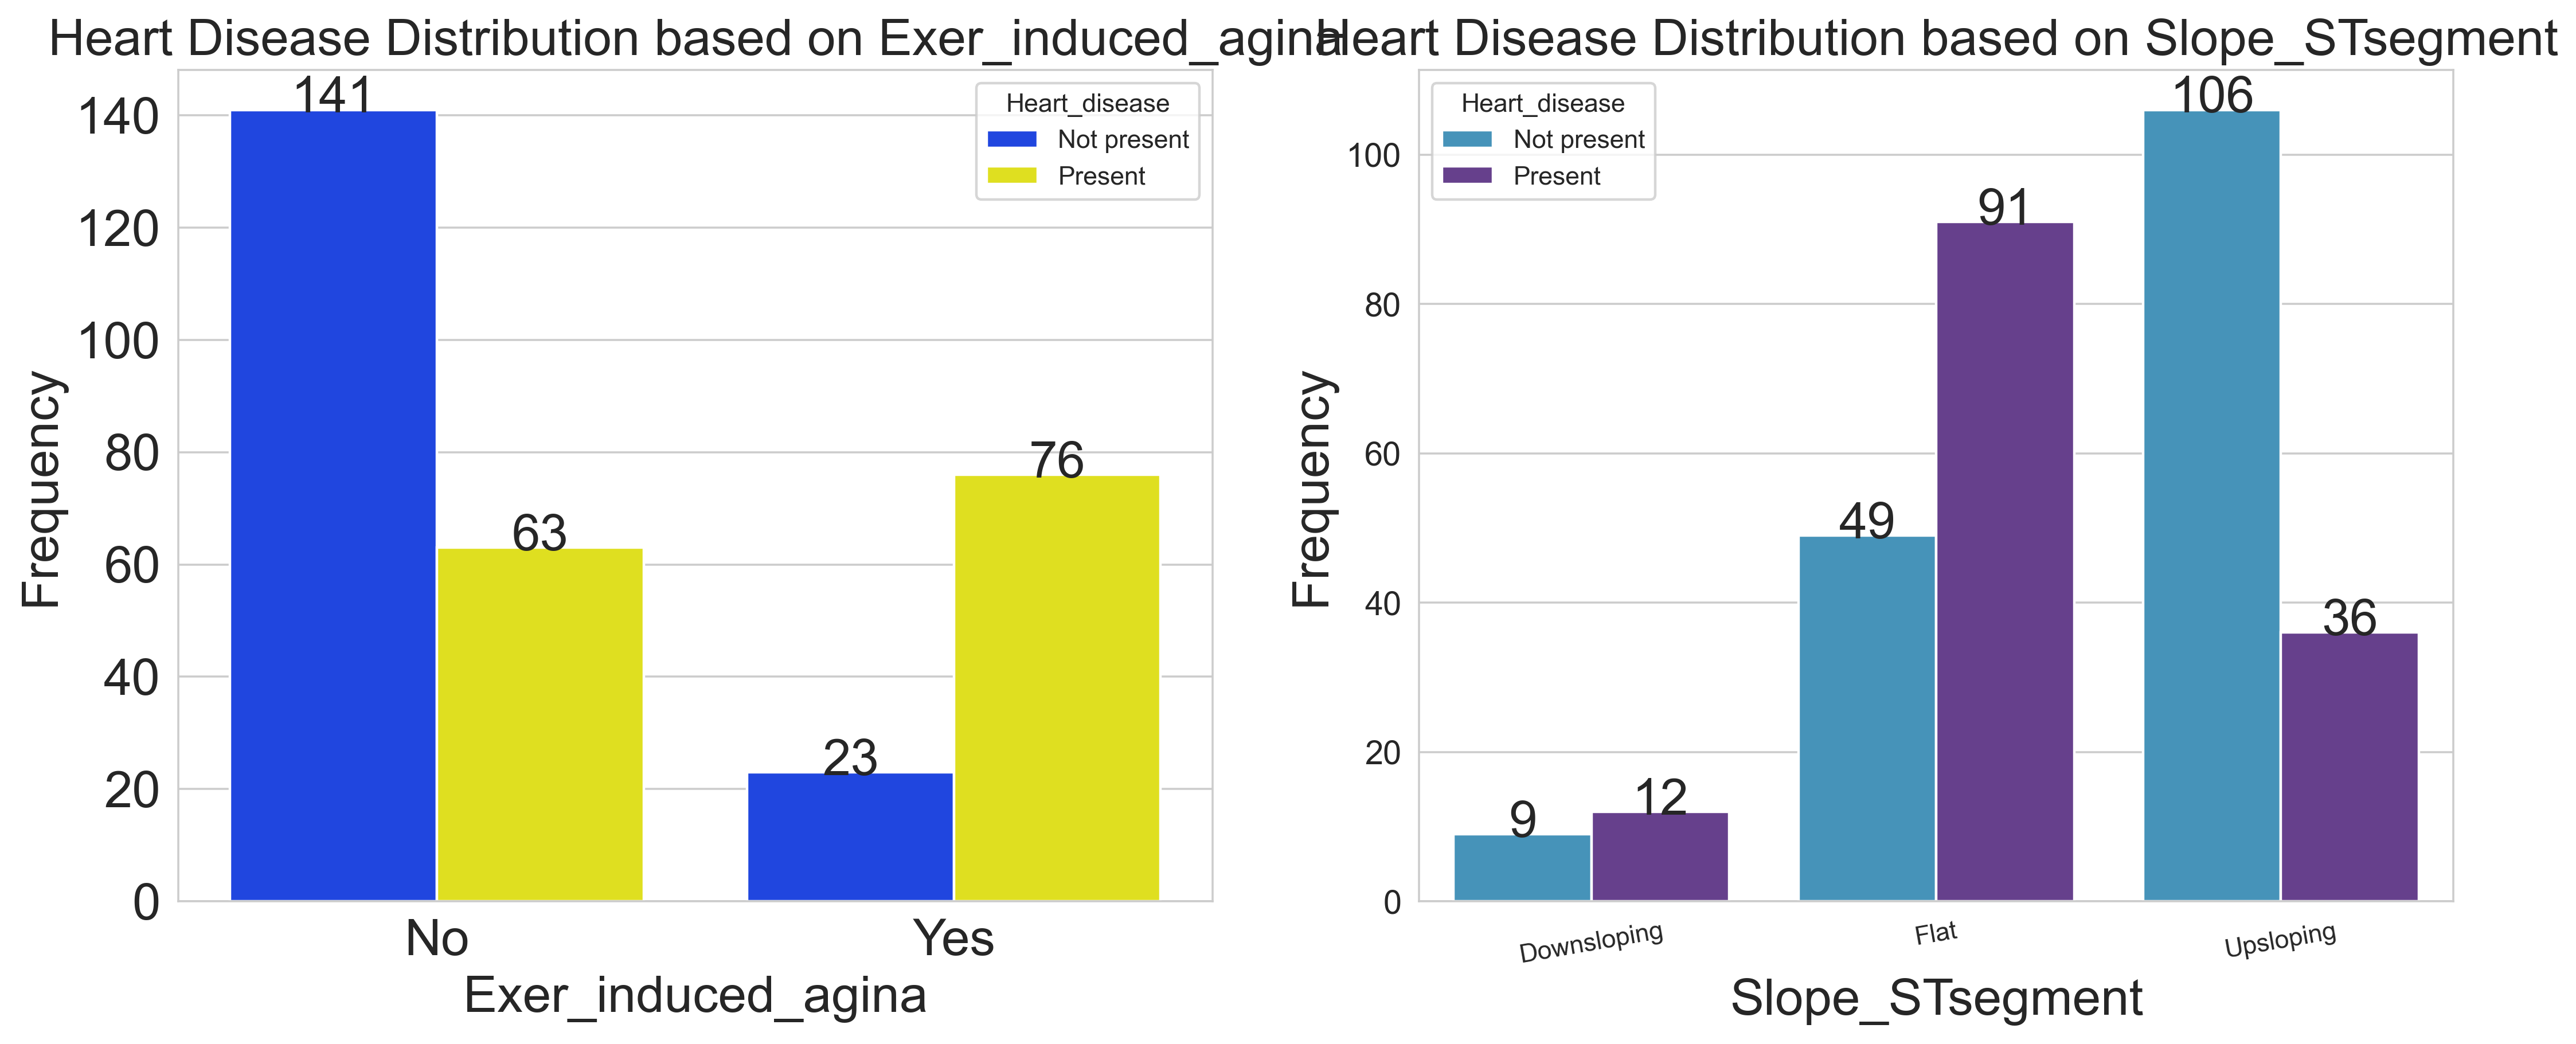

In [623]:
bivariate_analysis("Exer_induced_agina","Slope_STsegment",color_palette_1[2:4],color_palette_2[1:6],320,0,10,20,13)
plt.savefig("Exer_induced_agina and Slope_STsegment on Heart_disease_Bivariate")

In [624]:
chi_square_test("Exer_induced_agina")

---------Hypothesis----------
H0(Null Hypothesis) = Heart disease does not dependent on Exer_induced_agina
H1(Alternative Hypothesis)= Heart disease is influenced by Exer_induced_agina
-----------------------------TABLE-------------------------------
Heart_disease       Not present  Present  All
Exer_induced_agina                           
No                          141       63  204
Yes                          23       76   99
All                         164      139  303
-----------------------------Statistic---------------------------
p-value is 0.0 & critical value is 56.52
Dependent(reject H0)
Exer_induced_agina is an important feature in influencing heart disease


In [625]:
%time
chi_square_test("Slope_STsegment")

Wall time: 0 ns
---------Hypothesis----------
H0(Null Hypothesis) = Heart disease does not dependent on Slope_STsegment
H1(Alternative Hypothesis)= Heart disease is influenced by Slope_STsegment
-----------------------------TABLE-------------------------------
Heart_disease    Not present  Present  All
Slope_STsegment                           
Downsloping                9       12   21
Flat                      49       91  140
Upsloping                106       36  142
All                      164      139  303
-----------------------------Statistic---------------------------
p-value is 0.0 & critical value is 45.78
Dependent(reject H0)
Slope_STsegment is an important feature in influencing heart disease


**Inference**
* More number of heart disease patients experience angina while doing treadmill test, whereas less number of heart disease patients are experiencing angina at rest. Since the chi-square critical value is very high therefore it is very important feature in explaining/predicting the heart disease & non-heart disease patients.
* Slowly up sloping ST segment depression (>1.5 mm, 80msec from the J point) usually indicates MI. Horizontal ST segment depression is considerable abnormal response. Down sloping ST segment depression represents severe MI. We observe more number of patients have abnormal Slope_of_the_ST_segment (indicated by Flat Slope_of_the_ST_segment). Number of patients with downsloping Slope_of_the_ST_segment is considerably very less than Flat Slope_of_the_ST_segment patients. This feature also seems important because chi-square critical value is very high.

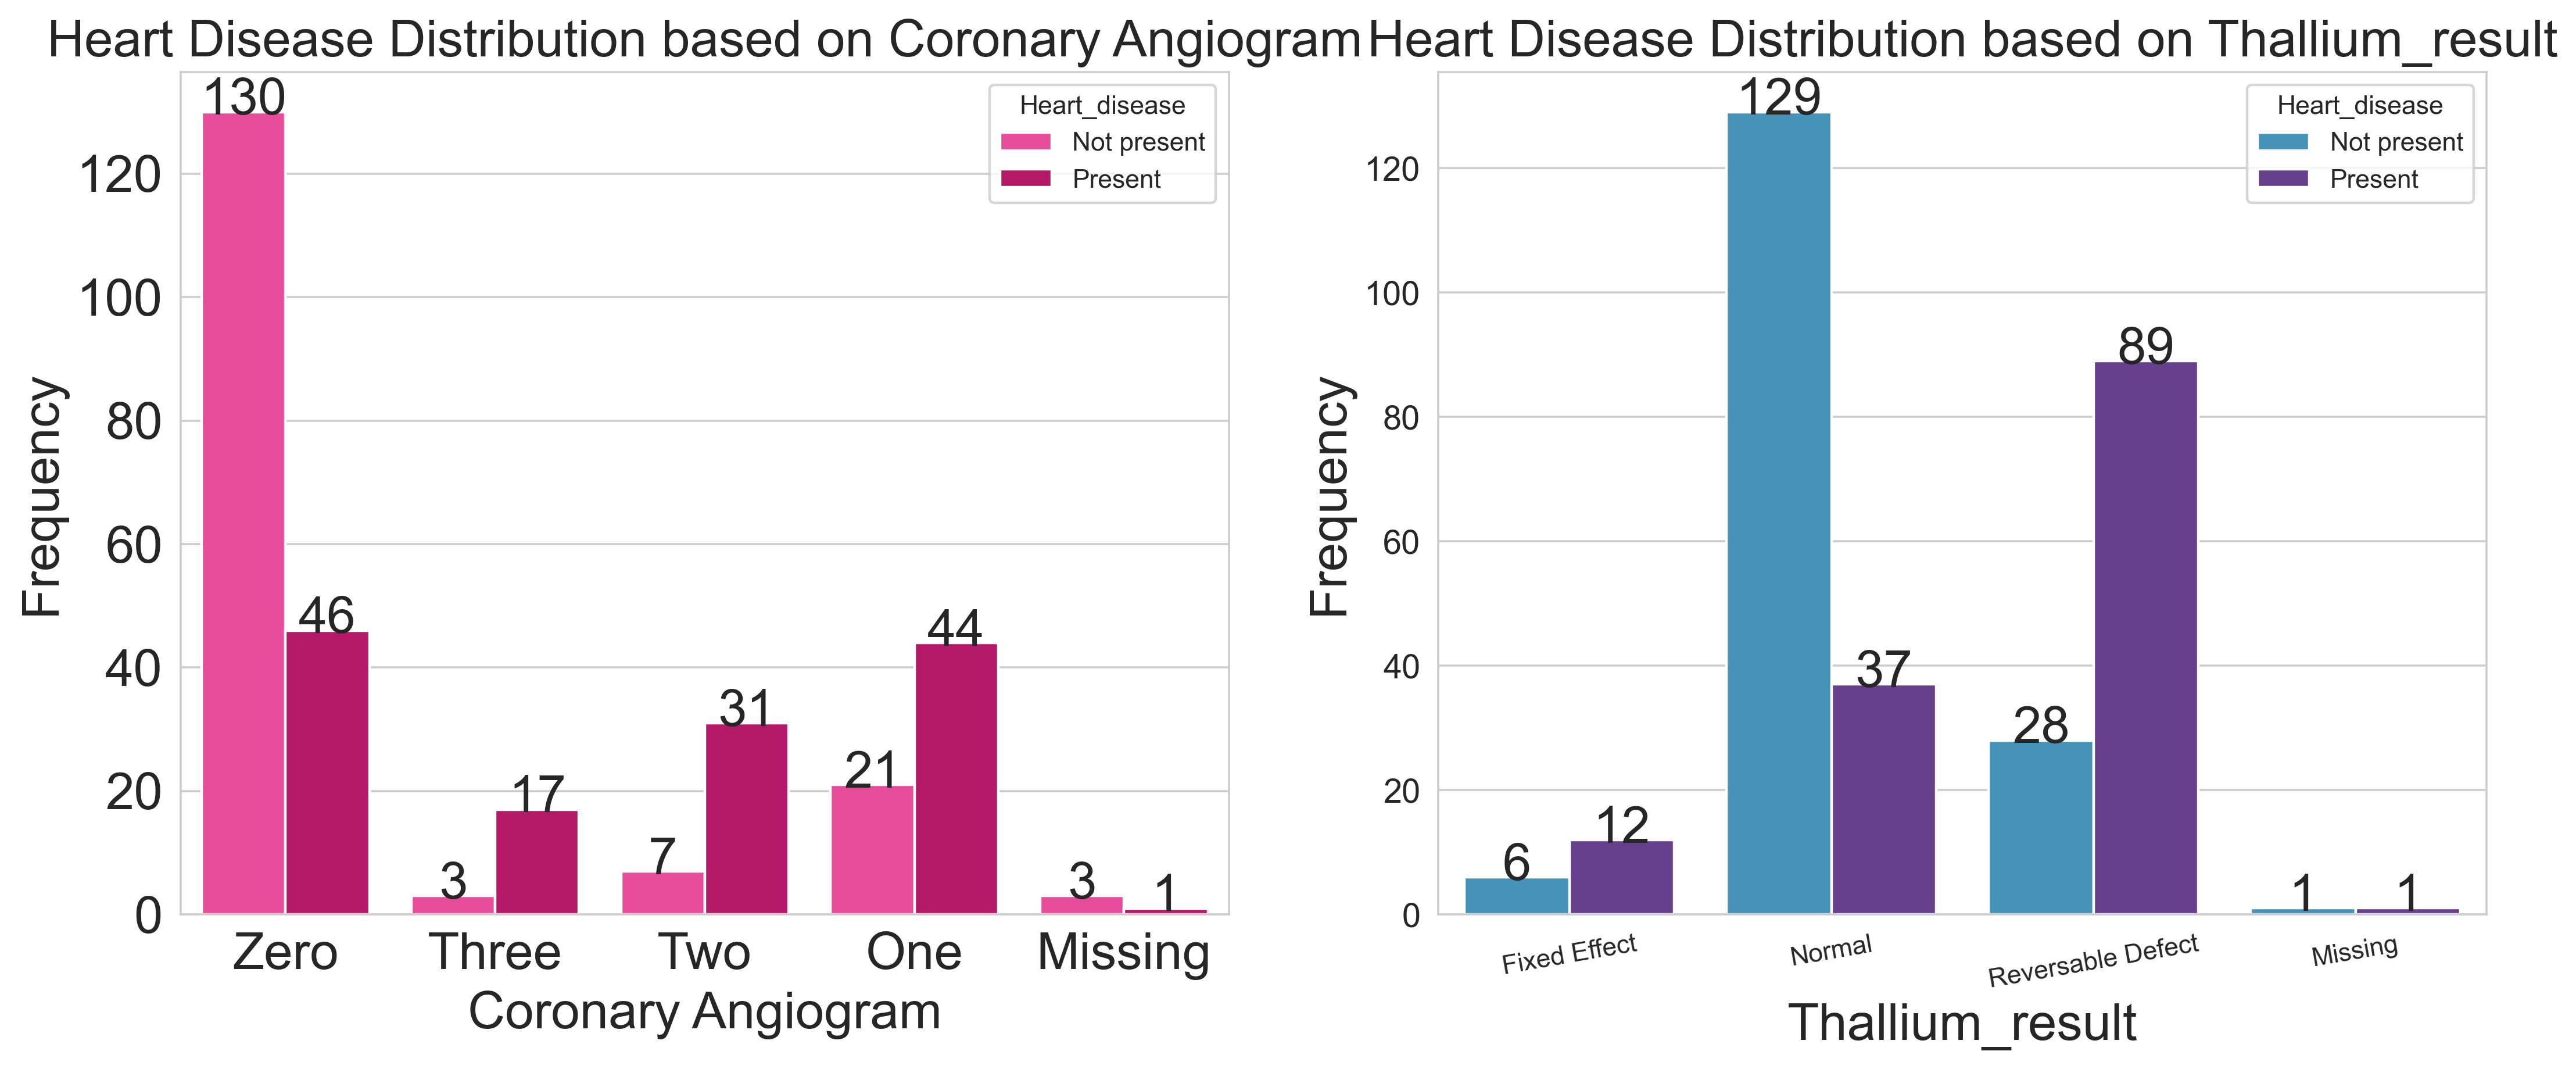

In [626]:
bivariate_analysis("Coronary Angiogram","Thallium_result",color_palette_1[4:7],color_palette_2[1:3],320,0,10,20,13)
plt.savefig("Coronary Angiogram & Thallium_result on Heart_disease_Bivariate")

In [627]:
chi_square_test("Thallium_result")

---------Hypothesis----------
H0(Null Hypothesis) = Heart disease does not dependent on Thallium_result
H1(Alternative Hypothesis)= Heart disease is influenced by Thallium_result
-----------------------------TABLE-------------------------------
Heart_disease      Not present  Present  All
Thallium_result                             
Fixed Effect                 6       12   18
Missing                      1        1    2
Normal                     129       37  166
Reversable Defect           28       89  117
All                        164      139  303
-----------------------------Statistic---------------------------
p-value is 0.0 & critical value is 83.3
Dependent(reject H0)
Thallium_result is an important feature in influencing heart disease


**Inference**
- We notice that more number of non-heart disease patients with no/zero defect in their major vessels that supply blood, oxygen and nutrients to the heart than heart disease patients. But as the number of major vessels blocked increases we observe more number of heart disease patients than non-heart disease patients. These patients need immediate attention (indicated by angiogram results).
- We observe more number of heart disease patients with reversible defect indicated by Thallium test.
- Both the variables also seems important indicated by a very high chi-square critical value.

###### 5.3 Distribution of Numerical Variable & t-Test

In [629]:
def num_distribution1(num_var,color1,color2):
    """This function draws two curves for heart_disease present and heart_disease not present resp."""
    
    fig, ax = plt.subplots(figsize=(5,5), dpi = 100)
    ##for curve
    a = sns.distplot(x = dataset.loc[dataset["Heart_disease"]=="Present"][num_var],hist=False,color = color1,
                     ax = ax,label = "Present")
    ## for 1st mean line
    plt.axvline(np.mean(dataset.loc[dataset["Heart_disease"]=="Present"][num_var]), color =color1,linestyle = "dashed", linewidth = 1)
   
    ##for curve
    b = sns.distplot(x = dataset.loc[dataset["Heart_disease"]=="Not present"][num_var],hist=False, color = color2,
                     ax = ax,label = "Not present")
    
    ## for 2nd mean line
    plt.axvline(np.mean(dataset.loc[dataset["Heart_disease"]=="Not present"][num_var]), color = color2,linestyle = "dashed", linewidth = 1)

    ax.set_title(f"Distributions of {num_var} achieved \naccording to Heart Disease", fontsize=10)
    ax.set_xlabel(f"{num_var}", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.tick_params(axis='both',which='major', labelsize=10)
    ax.tick_params(axis='both',which='minor', labelsize=10)
    ax.legend(loc='upper left', fontsize=10)


## Hypothesis
    print(f"(Null-Hypothesis)H0=Distribution of {num_var} for heart disease patient is same as of non-heart patients")
    print(f"(Alternate-Hypothesis)H1=Distribution of {num_var} for heart disease patient is different as of non-heart patients")

In [630]:
def compare_2_groups(arr1,arr2,alpha, sample_size):
    """This function return the t-test of two group means"""
    stat,p = ttest_ind(arr1,arr2)
    print("Statistics = %.3f, p = %.3f" % (stat,p))
    if p>alpha:
        print("Same distribution (fail to reject H0)")
    else:
        print("Different distribution(reject H0)")

###### 5.3.1 Age

(Null-Hypothesis)H0=Distribution of Age for heart disease patient is same as of non-heart patients
(Alternate-Hypothesis)H1=Distribution of Age for heart disease patient is different as of non-heart patients
-----------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Statistics = 1.803, p = 0.075
Same distribution (fail to reject H0)


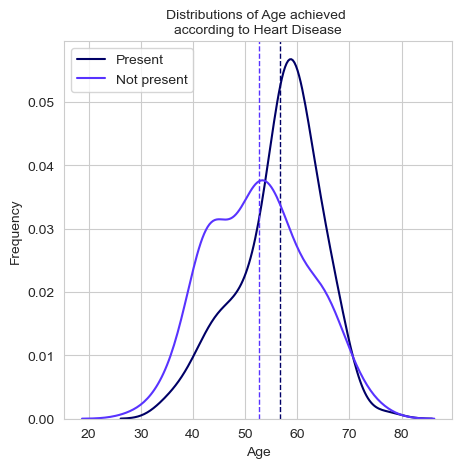

In [631]:
num_distribution1("Age",color1 =color_palette_1[0], color2=color_palette[3])
plt.savefig("Age_distribution_with_disease")
print("-----------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------")
sample_size = 50
Present=dataset.loc[dataset["Heart_disease"]=="Present"]["Age"]
Not_present = dataset.loc[dataset["Heart_disease"]=="Not present"]["Age"]
grp_1= np.random.choice(Present,sample_size)
grp_2=np.random.choice(Not_present, sample_size)
compare_2_groups(grp_1,grp_2,0.05,sample_size)

**The distribution of age and the risk for the heart disease indicates that heart disease with the age ranging from 55 to 70 is having high risk of heart disease as the development of coronary fatty streaks starts in this age range**

**5.3.2 Resting_BP**

(Null-Hypothesis)H0=Distribution of Resting_BP for heart disease patient is same as of non-heart patients
(Alternate-Hypothesis)H1=Distribution of Resting_BP for heart disease patient is different as of non-heart patients
-----------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Statistics = 2.767, p = 0.007
Different distribution(reject H0)


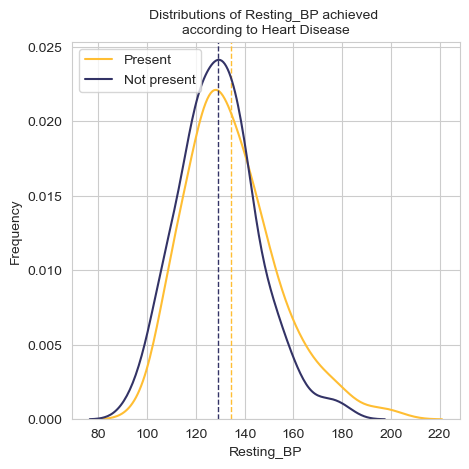

In [632]:
num_distribution1("Resting_BP", color_palette_3[0],color_palette_2[4])
plt.savefig("Resting_BP_distribution")
print("-----------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------")
sample_size = 50
Present=dataset.loc[dataset["Heart_disease"]=="Present"]["Resting_BP"]
Not_present = dataset.loc[dataset["Heart_disease"]=="Not present"]["Resting_BP"]
grp_1= np.random.choice(Present,sample_size)
grp_2=np.random.choice(Not_present, sample_size)
compare_2_groups(grp_1,grp_2,0.05,sample_size)

**5.3.3 Cholestrol**

(Null-Hypothesis)H0=Distribution of Cholestrol for heart disease patient is same as of non-heart patients
(Alternate-Hypothesis)H1=Distribution of Cholestrol for heart disease patient is different as of non-heart patients
-----------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Statistics = 1.418, p = 0.159
Same distribution (fail to reject H0)


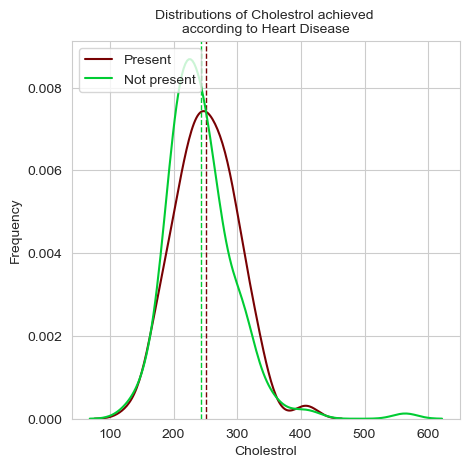

In [633]:
num_distribution1("Cholestrol", color_palette_3[2],color_palette_2[5])
plt.savefig("Cholestrol_distribution")
print("-----------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------")
sample_size = 50
Present=dataset.loc[dataset["Heart_disease"]=="Present"]["Cholestrol"]
Not_present = dataset.loc[dataset["Heart_disease"]=="Not present"]["Cholestrol"]
grp_1= np.random.choice(Present,sample_size)
grp_2=np.random.choice(Not_present, sample_size)
compare_2_groups(grp_1,grp_2,0.05,sample_size)

**5.3.4 Maximum_HeartRate**

(Null-Hypothesis)H0=Distribution of Heart_rate for heart disease patient is same as of non-heart patients
(Alternate-Hypothesis)H1=Distribution of Heart_rate for heart disease patient is different as of non-heart patients
-----------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Statistics = -3.650, p = 0.000
Different distribution(reject H0)


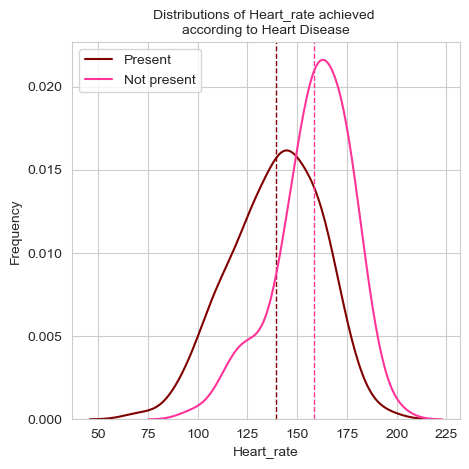

In [634]:
num_distribution1("Heart_rate", color_palette[0],color_palette_1[4])
plt.savefig("Heart_rate_distribution")
print("-----------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------")
sample_size = 50
Present=dataset.loc[dataset["Heart_disease"]=="Present"]["Heart_rate"]
Not_present = dataset.loc[dataset["Heart_disease"]=="Not present"]["Heart_rate"]
grp_1= np.random.choice(Present,sample_size)
grp_2=np.random.choice(Not_present, sample_size)
compare_2_groups(grp_1,grp_2,0.05,sample_size)

**5.3.5 ST_depression**

(Null-Hypothesis)H0=Distribution of ST_depression for heart disease patient is same as of non-heart patients
(Alternate-Hypothesis)H1=Distribution of ST_depression for heart disease patient is different as of non-heart patients
-----------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Statistics = 4.362, p = 0.000
Different distribution(reject H0)


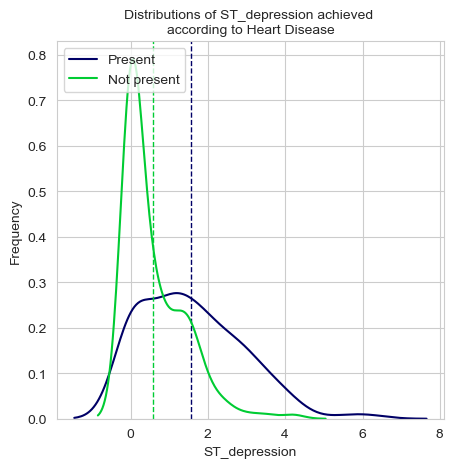

In [635]:
num_distribution1("ST_depression", color_palette_1[0],color_palette_2[5])
plt.savefig("ST_depression_distribution")
print("-----------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------")
sample_size = 50
Present=dataset.loc[dataset["Heart_disease"]=="Present"]["ST_depression"]
Not_present = dataset.loc[dataset["Heart_disease"]=="Not present"]["ST_depression"]
grp_1= np.random.choice(Present,sample_size)
grp_2=np.random.choice(Not_present, sample_size)
compare_2_groups(grp_1,grp_2,0.05,sample_size)

## Model Preprocessing

In [47]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [50]:
X_std=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.25,random_state=40)

## Model Fitting and Prediction

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.82        34

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



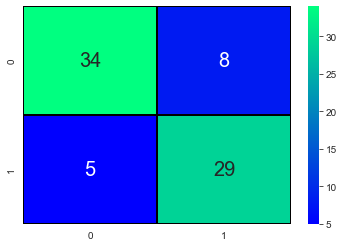

In [72]:
Lr= LogisticRegression(class_weight="balanced",random_state=1234)
model=Lr.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="winter",linewidths=0.3,linecolor='black',annot_kws={"size":20})
print(classification_report(y_test,y_pred))

This study uses a logistic regression algorithm as a solution
to the problem. With the use of the algorithm, it was
found that the logistic regression algorithm was
classified as an effective and efficient algorithm in
predicting the main factors causing cardiovascular
disease as the problem raised in this study. 

Confusion matrix is shown, with an **accuracy of
83%** and an error rate that tends to be small at
0.17, the logistic regression algorithm can be
said to be successful in predicting factors that affect
cardiovascular performance significantly. Especially
with calculations using specific estimated values, it
can be obtained the probability of the potential for
cardiovascular disease in a person.

By modelling data and predicting data using a
logistic regression algorithm, it was found that **not all
factors had a significant influence** on the performance
of the cardiovascular system. The **factors that affect
cardiovascular performance are gender, trestbps -
blood pressure level, thalach - heart rate, and canumber of vessels affected by fluorosophy**. By
obtaining an estimated value of these factors,
probabilities can be obtained related to the potential
for cardiovascular disease in a person.

## 6. Future Advances & Conclusion 

* From the above analysis it is referred that Age, maximum heart rate, Blood Pressure, cholestrol plays a vital role in influencing the heart disease more along with some important symptoms like **if a person has Asymptomatic pain, gender is male, thalium has reversable defect, Slope_Stsegment is Flat and Exercise_induced agina is yes then chances of a person being affected by disease is more compared to other symptoms/test.**

* Heart Stroke and vascular disease are the major cause of disability and premature death. Chest Pain is the key to recognize the heart disease. In this work, the heart disease are predicted by considering major factors with four type of chest pain.